In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import xlrd
import numpy as np
from matplotlib_venn import venn2, venn3
import openpyxl
import seaborn as sns

In [353]:

def group(list):
    grouped=[]
    nonpolar=['G','A','V','L','I','P','F','W','M']
    polar=['S','T','C','Y','N','Q']
    basic=['K','R','H']
    acidic=['D','E']
    for item in list:
        new_item=''
        for letter in item:
            if letter in nonpolar:
                new_item+='N'
            if letter in polar:
                new_item+='P'
            if letter in basic:
                new_item+='B'
            if letter in acidic:
                new_item+='A'
        grouped.append(new_item)
    return grouped

def get_letter_frequency(list):
    letters={
        'A':0,
        'G':0,
        'V':0,
        'L':0,
        'I':0,
        'P':0,
        'F':0,
        'W':0,
        'M':0,
        'S':0,
        'T':0,
        'C':0,
        'Y':0,
        'N':0,
        'Q':0,
        'K':0,
        'R':0,
        'H':0,
        'D':0,
        'E':0
    }
    for word in list:
        for letter in word:
            letters[letter] +=1
    return letters

Normal_aminoacids={ #From swissprot
        'A':8.25,
        'G':3.93,
        'V':6.86,
        'L':9.65,
        'I':5.92,
        'P':4.73,
        'F':3.68,
        'W':1.09,
        'M':2.41,
        'S':6.63,
        'T':5.35,
        'C':1.38,
        'Y':2.92,
        'N':4.06,
        'Q':3.93,
        'K':5.81,
        'R':5.53,
        'H':2.27,
        'D':5.46,
        'E':6.72
    }


{'A': 2,
 'G': 4,
 'V': 0,
 'L': 0,
 'I': 0,
 'P': 0,
 'F': 0,
 'W': 0,
 'M': 0,
 'S': 0,
 'T': 0,
 'C': 0,
 'Y': 0,
 'N': 0,
 'Q': 0,
 'K': 0,
 'R': 0,
 'H': 0,
 'D': 0,
 'E': 0}

In [203]:

def slicydicy(word):
    word= word.split('|')[2]
    word=word.split(':')[0]
    word=word.split('_')[0]
    return word

mapp='peptide_sample_inf'
files = os.listdir(mapp)
# gets all xlsx files in cwd
files_xlsx = [f for f in files if f[-4:] == 'xlsx']
df = pd.DataFrame()
for file in files_xlsx:
    data = pd.read_excel(mapp+ '/' +file, 'peptide')
    data=data.loc[data['#Feature']>=4]
    df = df.append(data)

df.dropna(subset=['Accession'], inplace=True, how='any')
df.reset_index(drop=True)
df['count'] = 1
df['Accession']=df['Accession'].apply(lambda x: slicydicy(x))
df = df.groupby(['Accession']).sum()
tot=df['#Feature'].sum()
df=df.sort_values(['#Feature'], ascending=False)[0:30]
df=df['#Feature']
df_misc=df[10:len(df)]
df_imp=df[0:10]
df_list_imp=list(df_imp)
other =df_misc.sum()
df_list_imp.append(other)
df_list_imp

105


[2298, 1255, 876, 417, 381, 230, 198, 162, 123, 114, 1050]

In [197]:
df_misc.sum()
len(df_imp)
test =(list(df_imp.keys()))
test.append('Other')
test

['FIBA',
 'HBA',
 'APOA4',
 'A1AT',
 'APOB',
 'ITIH4',
 'APOA1',
 'HBB',
 'G3P',
 'APOC2',
 'Other']

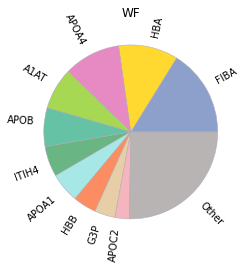

In [198]:
g=(0.4, 0.7607843137254902, 0.6470588235294118)
r=(0.9882352941176471, 0.5529411764705883, 0.3843137254901961)
l=(0.5529411764705883, 0.6274509803921569, 0.796078431372549)
p=(0.9058823529411765, 0.5411764705882353, 0.7647058823529411)
lg=(0.6509803921568628, 0.8470588235294118, 0.32941176470588235)
y=(1.0, 0.8509803921568627, 0.1843137254901961)

rc1=('#69b584')
rc2=('#a7e8e7')
rc3=('#e8cea7')
rc4=('#f5b5bf')
rc5=('#b8b4b4')

WF_colors=[l,y,p,lg,g,rc1,rc2,r,rc3,rc4,rc5]
wp = { 'linewidth' : 0.5, 'edgecolor' : "#afabb3" } 
plt.pie(list(df_list_imp),labels = test , wedgeprops=wp, rotatelabels=True, colors=WF_colors) 
plt.title('WF')
plt.savefig('WF_prot_pie.svg', transparent=True, bbox='tight')

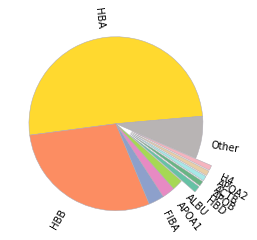

In [195]:
inf_colors=[y,r,l,p,lg,g,rc1,rc2,rc3,rc4,rc5]
wp = { 'linewidth' : 0.5, 'edgecolor' : "#afabb3" } 
plt.pie(list(df_list_imp),labels = test , wedgeprops=wp, rotatelabels=True, explode=[0,0,0,0,0,0.2,0.2,0.2,0.2,0.2,0],colors=colors,startangle= 5 ) 
plt.savefig('INF_prot_pie.svg', transparent=True, bbox='tight')

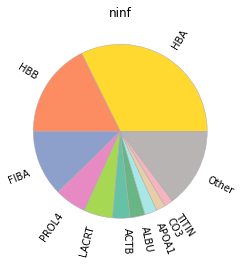

In [191]:
ninf_colors=[y,r,l,p,lg,g,rc1,rc2,rc3,rc4,rc5]
wp = { 'linewidth' : 0.5, 'edgecolor' : "#afabb3" } 
plt.pie(list(df_list_imp),labels = test , wedgeprops=wp, rotatelabels=True, colors=colors) 
plt.title('ninf')
plt.savefig('NINF_prot_pie.svg', transparent=True, bbox='tight')

In [341]:

mapp='peptide_sample_ninf'
files = os.listdir(mapp)
# gets all xlsx files in cwd
files_xlsx = [f for f in files if f[-4:] == 'xlsx']
np_list=[]
df = pd.DataFrame()
for file in files_xlsx:
    data = pd.read_excel(mapp+ '/' +file, 'peptide')
    data.dropna(subset=['Accession'], inplace=True, how='any')
    data=data.loc[data['#Feature']>=4]
    data['count']=1
    data['Accession']=data['Accession'].apply(lambda x: slicydicy(x))
    data=data.groupby(['Accession'], as_index=False).sum()
    np_list.append(int(data.loc[(data['Accession']=='HBB')]['#Feature']))

print(np_list)
print(np.average(np_list))
print(np.std(np_list, ddof=1))

[286, 311, 658]
418.3333333333333
207.93348295388438


In [253]:
mapp='peptide_sample_inf'
files = os.listdir(mapp)
# gets all xlsx files in cwd
files_xlsx = [f for f in files if f[-4:] == 'xlsx']
df = pd.DataFrame()
np_list=[]
for file in files_xlsx:
    data = pd.read_excel(mapp+ '/' +file, 'peptide')
    data.dropna(subset=['Accession'], inplace=True, how='any')
    data=data.loc[data['#Feature']>=4]
    data['count']=1
    data['Accession']=data['Accession'].apply(lambda x: slicydicy(x))
    data=data.groupby(['Accession'], as_index=False).sum()
    np_list.append(int(data.loc[(data['Accession']=='HBB')]['#Feature']))

print(np_list)
print(np.average(np_list))
print(np.std(np_list,ddof=1))

   Accession  #Feature
31       HBA      2831
32       HBB      1575
4      APOA1       131
23      FIBA       123
2       ALBU        90
   Accession  #Feature
31       HBA      2831
   Accession  #Feature
32       HBB      1575
   Accession  #Feature
12       HBA       484
13       HBB       280
2       ALBU        86
9       FIBA        72
0       ACTB        24
   Accession  #Feature
12       HBA       484
   Accession  #Feature
13       HBB       280
   Accession  #Feature
41       HBA      3440
42       HBB      2031
26      FIBA       193
5      APOA1       169
3       ACTB       100
   Accession  #Feature
41       HBA      3440
   Accession  #Feature
42       HBB      2031
[1575, 280, 2031]
1295.3333333333333
908.3833625366183


In [256]:
mapp='WF'
files = os.listdir(mapp)
# gets all xlsx files in cwd
files_xlsx = [f for f in files if f[-4:] == 'xlsx']
df = pd.DataFrame()
np_list=[]
for file in files_xlsx:
    data = pd.read_excel(mapp+ '/' +file, 'peptide')
    data.dropna(subset=['Accession'], inplace=True, how='any')
    data=data.loc[data['#Feature']>=4]
    data['count']=1
    data['Accession']=data['Accession'].apply(lambda x: slicydicy(x))
    data=data.groupby(['Accession'], as_index=False).sum()
    print(data[['Accession','#Feature']].sort_values('#Feature', ascending=False)[0:5])
    print(data.loc[data['Accession']=='HBA'][['Accession','#Feature']])
    print(data.loc[data['Accession']=='HBB'][['Accession','#Feature']])
    np_list.append(int(data.loc[(data['Accession']=='HBB')]['#Feature']))

print(np_list)
print(np.average(np_list))
print(np.std([np_list],ddof=1))
    


   Accession  #Feature
65       HBA       449
52      FIBA       365
15      APOB       294
14     APOA4       245
66       HBB       183
   Accession  #Feature
65       HBA       449
   Accession  #Feature
66       HBB       183
   Accession  #Feature
53      FIBA       483
17      APOB       405
68       HBA       343
16     APOA4       275
85     ITIH4       172
   Accession  #Feature
68       HBA       343
   Accession  #Feature
69       HBB       128
   Accession  #Feature
44      FIBA       766
59       HBA       387
10     APOA4       379
0       A1AT       252
73     ITIH4       210
   Accession  #Feature
59       HBA       387
   Accession  #Feature
60       HBB        97
   Accession  #Feature
36      FIBA       487
9      APOA4       452
57     ITIH4       193
7      APOA1       143
0       A1AT        91
   Accession  #Feature
48       HBA        58
   Accession  #Feature
49       HBB        18
   Accession  #Feature
1       A1AT       469
67       HBA       377
54      FIB

In [340]:
mapp='peptide_sample_inf'
files = os.listdir(mapp)
# gets all xlsx files in cwd
files_xlsx = [f for f in files if f[-4:] == 'xlsx']
df = pd.DataFrame()
for file in files_xlsx:
    data = pd.read_excel(mapp+ '/' +file, 'peptide')
    data = data.loc[(data['#Feature'] >= 4)] # sorts out if feature<4
    data['Peptide']=data['Peptide'].str.replace('[^a-zA-Z]','')
    data['count']=1
    data = data.groupby(['Peptide','Accession'], as_index=False).sum()
    df = df.append(data)

df['count'] = 1
df = df.groupby(['Accession','Peptide']).sum()
df.reset_index(['Peptide'], inplace=True)
df['N-cut']=df['Peptide'].apply(lambda x: x[0:4]) #this can be changed to view different amounts of AA
df['C-cut']=df['Peptide'].apply(lambda x: x[-4::1])
df['First aa']=df['Peptide'].apply(lambda x: x[0:1])
df['Last aa']=df['Peptide'].apply(lambda x: x[-1::1])
df['Spectral count']=df['#Feature']
df = df[['Peptide', 'Spectral count','count', 'N-cut', 'C-cut','First aa','Last aa']]


df.sort_values('Spectral count', ascending = False)

Peptide  \
Accession                                                          
sp|P68871|HBB_HUMAN:sp|P02042|HBD_HUMAN             AGVANALAHKYH   
sp|P68871|HBB_HUMAN:sp|P02042|HBD_HUMAN              GVANALAHKYH   
sp|P68871|HBB_HUMAN:sp|P02042|HBD_HUMAN                ANALAHKYH   
sp|P68871|HBB_HUMAN                                  VHLTPEEKSAV   
sp|P69905|HBA_HUMAN                                    STVLTSKYR   
...                                                          ...   
sp|P63261|ACTG_HUMAN:sp|P60709|ACTB_HUMAN:sp|P6...  TALAPSTMKIKI   
sp|P63261|ACTG_HUMAN:sp|P60709|ACTB_HUMAN:sp|P6...      TEAPLNPK   
sp|P63261|ACTG_HUMAN:sp|P60709|ACTB_HUMAN:sp|P6...      TTAEREIV   
sp|P68431|H31_HUMAN:sp|Q71DI3|H32_HUMAN:sp|Q166...    PATGGVKKPH   
sp|Q99878|H2A1J_HUMAN:sp|Q96KK5|H2A1H_HUMAN:sp|...     AGLQFPVGR   

                                                    Spectral count  count  \
Accession                                                                   
sp|P68871|HBB_HUMAN:sp|P02042|HBD_HUMAN                        109      3   
sp|P68871|HBB_HUMAN:sp|P02042|HBD_HUMAN                        109      3   
sp|P68871|HBB_HUMAN:sp|P02042|HBD_HUMAN                         94      3   
sp|P68871|HBB_HUMAN                                             78      3   
sp|P69905|HBA_HUMAN                                             77      3   
...                                                            ...    ...   
sp|P63261|ACTG_HUMAN:sp|P60709|ACTB_HUMAN:sp|P6...               4      1   
sp|P63261|ACTG_HUMAN:sp|P60709|ACTB_HUMAN:sp|P6...               4      1   
sp|P63261|ACTG_HUMAN:sp|P60709|ACTB_HUMAN:sp|P6...               4      1   
sp|P68431|H31_HUMAN:sp|Q71DI3|H32_HUMAN:sp|Q166...               4      1   
sp|Q99878|H2A1J_HUMAN:sp|Q96KK5|H2A1H_HUMAN:sp|...               4      1   

                                                   N-cut C-cut First aa  \
Accession                                                                 
sp|P68871|HBB_HUMAN:sp|P02042|HBD_HUMAN             AGVA  HKYH        A   
sp|P68871|HBB_HUMAN:sp|P02042|HBD_HUMAN             GVAN  HKYH        G   
sp|P68871|HBB_HUMAN:sp|P02042|HBD_HUMAN             ANAL  HKYH        A   
sp|P68871|HBB_HUMAN                                 VHLT  KSAV        V   
sp|P69905|HBA_HUMAN                                 STVL  SKYR        S   
...                                                  ...   ...      ...   
sp|P63261|ACTG_HUMAN:sp|P60709|ACTB_HUMAN:sp|P6...  TALA  KIKI        T   
sp|P63261|ACTG_HUMAN:sp|P60709|ACTB_HUMAN:sp|P6...  TEAP  LNPK        T   
sp|P63261|ACTG_HUMAN:sp|P60709|ACTB_HUMAN:sp|P6...  TTAE  REIV        T   
sp|P68431|H31_HUMAN:sp|Q71DI3|H32_HUMAN:sp|Q166...  PATG  KKPH        P   
sp|Q99878|H2A1J_HUMAN:sp|Q96KK5|H2A1H_HUMAN:sp|...  AGLQ  PVGR        A   

                                                   Last aa  
Accession                                                   
sp|P68871|HBB_HUMAN:sp|P02042|HBD_HUMAN                  H  
sp|P68871|HBB_HUMAN:sp|P02042|HBD_HUMAN                  H  
sp|P68871|HBB_HUMAN:sp|P02042|HBD_HUMAN                  H  
sp|P68871|HBB_HUMAN                                      V  
sp|P69905|HBA_HUMAN                                      R  
...                                                    ...  
sp|P63261|ACTG_HUMAN:sp|P60709|ACTB_HUMAN:sp|P6...       I  
sp|P63261|ACTG_HUMAN:sp|P60709|ACTB_HUMAN:sp|P6...       K  
sp|P63261|ACTG_HUMAN:sp|P60709|ACTB_HUMAN:sp|P6...       V  
sp|P68431|H31_HUMAN:sp|Q71DI3|H32_HUMAN:sp|Q166...       H  
sp|Q99878|H2A1J_HUMAN:sp|Q96KK5|H2A1H_HUMAN:sp|...       R  

[1419 rows x 7 columns]

In [341]:
aminoacids= get_letter_frequency(df['Peptide']*df['Spectral count'])
N_aminoacids=get_letter_frequency(df['N-cut']*df['Spectral count'])
C_aminoacids=get_letter_frequency(df['C-cut']*df['Spectral count'])
First_aa=get_letter_frequency(df['First aa']*df['Spectral count'])
Last_aa=get_letter_frequency(df['Last aa']*df['Spectral count'])
N_aminoacids

{'A': 6961,
 'G': 4771,
 'V': 5079,
 'L': 6407,
 'I': 293,
 'P': 3173,
 'F': 2250,
 'W': 781,
 'M': 552,
 'S': 4248,
 'T': 2823,
 'C': 0,
 'Y': 1405,
 'N': 1813,
 'Q': 571,
 'K': 2150,
 'R': 632,
 'H': 3829,
 'D': 4745,
 'E': 2605}

Text(0.5, 1.0, 'Last aminoacid')

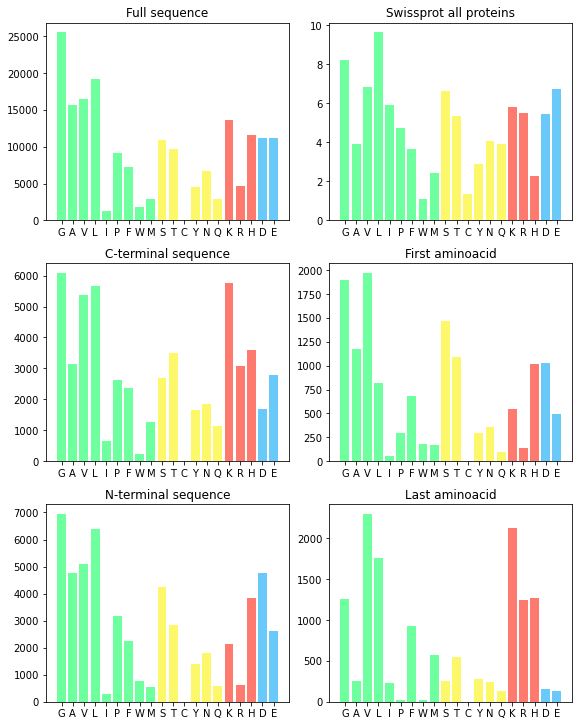

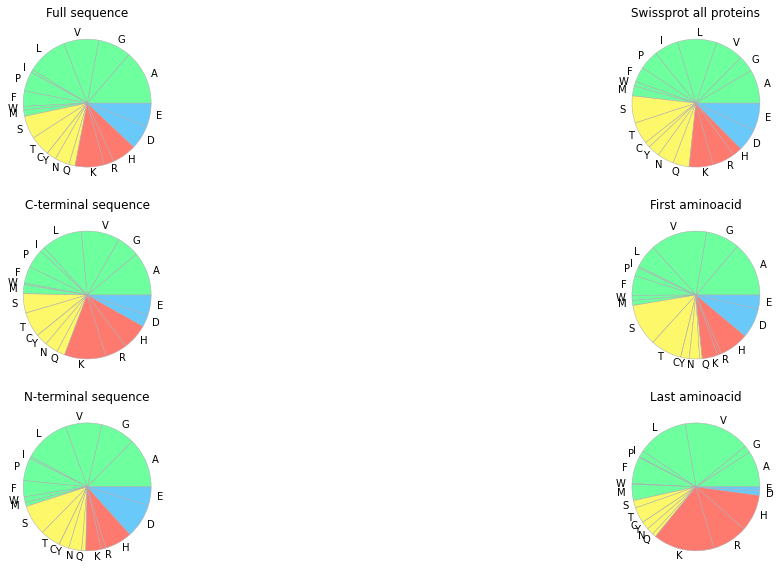

In [342]:

color=['#6eff9e', '#6eff9e','#6eff9e','#6eff9e','#6eff9e','#6eff9e','#6eff9e','#6eff9e','#6eff9e','#fcf86a','#fcf86a','#fcf86a','#fcf86a','#fcf86a','#fcf86a','#ff7a6e','#ff7a6e','#ff7a6e','#69cafa','#69cafa','#69cafa']


fig, ax1 = plt.subplots(3,2,figsize=(8,10))
ax1[0,0].bar(range(len(aminoacids)), list(aminoacids.values()), align='center', color=color)
ax1[2,0].bar(range(len(N_aminoacids)), list(N_aminoacids.values()), align='center', color=color)
ax1[1,0].bar(range(len(C_aminoacids)), list(C_aminoacids.values()), align='center', color=color)
ax1[1,1].bar(range(len(First_aa)), list(First_aa.values()), align='center', color=color)
ax1[2,1].bar(range(len(Last_aa)), list(Last_aa.values()), align='center', color=color)
ax1[0,1].bar(range(len(Normal_aminoacids)), list(Normal_aminoacids.values()), align='center', color=color)

ax1[0,0].set_title('Full sequence')
ax1[0,1].set_title('Swissprot all proteins')
ax1[2,0].set_title('N-terminal sequence')
ax1[1,0].set_title('C-terminal sequence')
ax1[1,1].set_title('First aminoacid')
ax1[2,1].set_title('Last aminoacid')

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.setp(ax1, xticks=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], xticklabels=['G','A','V','L','I','P','F','W','M','S','T','C','Y','N','Q','K','R','H','D','E'])

fig, ax = plt.subplots(3,2,figsize=(20,10))
wp = { 'linewidth' : 0.5, 'edgecolor' : "#afabb3" } 

ax[0,0].pie(aminoacids.values(),labels = aminoacids.keys(), colors=color, wedgeprops=wp) 
ax[2,0].pie(N_aminoacids.values(),labels =N_aminoacids.keys(), colors=color, wedgeprops=wp) 
ax[1,0].pie(C_aminoacids.values(),labels = C_aminoacids.keys(), colors=color, wedgeprops=wp) 
ax[1,1].pie(First_aa.values(),labels = First_aa.keys(), colors=color, wedgeprops=wp) 
ax[2,1].pie(Last_aa.values(),labels = Last_aa.keys(), colors=color, wedgeprops=wp) 
ax[0,1].pie(Normal_aminoacids.values(),labels = Normal_aminoacids.keys(), colors=color, wedgeprops=wp) 

ax[0,0].set_title('Full sequence')
ax[0,1].set_title('Swissprot all proteins')
ax[2,0].set_title('N-terminal sequence')
ax[1,0].set_title('C-terminal sequence')
ax[1,1].set_title('First aminoacid')
ax[2,1].set_title('Last aminoacid')

# Finding duplicates

In [17]:

mapp='WF'
files = os.listdir(mapp)
# gets all xlsx files in cwd
files_xlsx = [f for f in files if f[-4:] == 'xlsx']
df = pd.DataFrame()
for_stdev=[]
total_number_of_peptides=0
number_of_files=0
for file in files_xlsx:
    number_of_files+=1
    data = pd.read_excel(mapp+ '/' +file, 'peptide')
    total_number_of_peptides+=len(data.index)
    data = data.loc[(data['#Feature'] >= 4)] # sorts out if feature<4
    print("Number of total (including modified) peptides in "+file+" "+str(len(data.index)))
    for_stdev.append(len(data.index))
    data['Peptide']=data['Peptide'].str.replace('[^a-zA-Z]','')
    data['count']=1
    data = data.groupby(['Peptide','Accession'], as_index=False).sum()
    data['Mass']=data['Mass']/data['count']
    data['Length']=data['Length']/data['count']
    data['RT']=data['RT']/data['count']
    print("Number of un-modified peptides in "+file+" "+str(len(data.index)))
    df = df.append(data)  # appends all data


df['count'] = 1
df = df.groupby(['Peptide','Accession']).sum()
df.reset_index(['Peptide'], inplace=True)
df['N-cut']=df['Peptide'].apply(lambda x: x[0:4])
df['C-cut']=df['Peptide'].apply(lambda x: x[-4::1])
df['First aa']=df['Peptide'].apply(lambda x: x[0:1])
df['Last aa']=df['Peptide'].apply(lambda x: x[-1::1])
df['Spectral count']=df['#Feature']
df['Spectral count WF1']=df['#Feature WF1']
df['Spectral count WF2']=df['#Feature WF2']
df['Spectral count WF3']=df['#Feature WF 3']
df['Spectral count WF4']=df['#Feature WF4']
df['Spectral count WF5']=df['#Feature WF5']
df = df[['Peptide', 'Mass', 'Length', 'RT', 'Spectral count', 'Spectral count WF1','Spectral count WF2', 'Spectral count WF3', 'Spectral count WF4','Spectral count WF5','count', 'N-cut', 'C-cut','First aa','Last aa']]
df['Mass']=df['Mass']/df['count']
df['Length']=df['Length']/df['count']
df['RT']=df['RT']/df['count']
df = df.sort_values(['Spectral count','Accession','count'], ascending=False)

aminoacids = get_letter_frequency(df['Peptide']*df['count'])
N_aminoacids=get_letter_frequency(df['N-cut']*df['count'])
C_aminoacids=get_letter_frequency(df['C-cut']*df['count'])
First_aa=get_letter_frequency(df['First aa']*df['count'])
Last_aa=get_letter_frequency(df['Last aa']*df['count'])


print("Standard deviation: "+ str(np.std(for_stdev)))
print("Average length: "+str(df['Length'].mean()))
print("Average mass: "+str(df['Mass'].mean()))
print('total number of peptides: '+str(total_number_of_peptides))
print("Number of peptides with feature>=4: "+str(len(df.index))+", in percent: "+str(100*(len(df.index))/(total_number_of_peptides))+" %")

df[df.duplicated(['Peptide'], keep=False)].sort_values('Peptide').to_excel('Duplicates.xlsx')

Number of total (including modified) peptides in peptide _WF1.xlsx 833
Number of un-modified peptides in peptide _WF1.xlsx 766
Number of total (including modified) peptides in peptide_WF2.xlsx 960
Number of un-modified peptides in peptide_WF2.xlsx 884
Number of total (including modified) peptides in peptide_WF3.xlsx 925
Number of un-modified peptides in peptide_WF3.xlsx 865
Number of total (including modified) peptides in peptide_WF4.xlsx 589
Number of un-modified peptides in peptide_WF4.xlsx 543
Number of total (including modified) peptides in peptide_WF5.xlsx 870
Number of un-modified peptides in peptide_WF5.xlsx 802
Standard deviation: 130.74341283598193
Average length: 12.612202688728026
Average mass: 1399.0946740277775
total number of peptides: 16657
Number of peptides with feature>=4: 1934, in percent: 11.610734225850994 %


# Investigating cut-sites

In [199]:

mapp='WF'
files = os.listdir(mapp)
# gets all xlsx files in cwd
files_xlsx = [f for f in files if f[-4:] == 'xlsx']
df = pd.DataFrame()
for_stdev=[]
total_number_of_peptides=0
number_of_files=0
for file in files_xlsx:
    number_of_files+=1
    data = pd.read_excel(mapp+ '/' +file, 'peptide')
    total_number_of_peptides+=len(data.index)
    data = data.loc[(data['#Feature'] >= 4)] # sorts out if feature<4
    print("Number of total (including modified) peptides in "+file+" "+str(len(data.index)))
    for_stdev.append(len(data.index))
    data['Peptide']=data['Peptide'].str.replace('[^a-zA-Z]','')
    data['count']=1
    data = data.groupby(['Peptide','Accession'], as_index=False).sum()
    data['Mass']=data['Mass']/data['count']
    data['Length']=data['Length']/data['count']
    data['RT']=data['RT']/data['count']
    print("Number of un-modified peptides in "+file+" "+str(len(data.index)))
    df = df.append(data)  # appends all data


df['count'] = 1
df = df.groupby(['Peptide','Accession']).sum()
df.reset_index(['Peptide'], inplace=True)
df['N-cut4']=df['Peptide'].apply(lambda x: x[0:4])
df['C-cut4']=df['Peptide'].apply(lambda x: x[-4::1])
df['N-cut1']=df['Peptide'].apply(lambda x: x[0:1])
df['C-cut1']=df['Peptide'].apply(lambda x: x[-1::1])
df['N-cut3']=df['Peptide'].apply(lambda x: x[0:3])
df['C-cut3']=df['Peptide'].apply(lambda x: x[-3::1])
df['N-cut5']=df['Peptide'].apply(lambda x: x[0:5])
df['C-cut5']=df['Peptide'].apply(lambda x: x[-5::1])
df['N-cut2']=df['Peptide'].apply(lambda x: x[0:2])
df['C-cut2']=df['Peptide'].apply(lambda x: x[-2::1])
df = df.sort_values(['#Feature','Accession','count'], ascending=False)

df=df[['count','#Feature','Peptide','N-cut1','C-cut1','N-cut2','C-cut2','N-cut3','C-cut3','N-cut4','C-cut4','N-cut5','C-cut5']]

df

Number of total (including modified) peptides in peptide _WF1.xlsx 833
Number of un-modified peptides in peptide _WF1.xlsx 766
Number of total (including modified) peptides in peptide_WF2.xlsx 960
Number of un-modified peptides in peptide_WF2.xlsx 884
Number of total (including modified) peptides in peptide_WF3.xlsx 925
Number of un-modified peptides in peptide_WF3.xlsx 865
Number of total (including modified) peptides in peptide_WF4.xlsx 589
Number of un-modified peptides in peptide_WF4.xlsx 543
Number of total (including modified) peptides in peptide_WF5.xlsx 870
Number of un-modified peptides in peptide_WF5.xlsx 802


count  #Feature  \
Accession                                                             
sp|Q04206|TF65_HUMAN                                    5       160   
sp|P01009|A1AT_HUMAN                                    4       103   
sp|P04406|G3P_HUMAN                                     5        65   
sp|Q14624|ITIH4_HUMAN                                   5        58   
sp|P06727|APOA4_HUMAN                                   5        58   
...                                                   ...       ...   
sp|O14791|APOL1_HUMAN                                   1         4   
sp|O14791|APOL1_HUMAN                                   1         4   
sp|A6NI72|NCF1B_HUMAN:sp|A8MVU1|NCF1C_HUMAN:sp|...      1         4   
sp|A0A0C4DH69|KV109_HUMAN                               1         4   
sp|A0A0C4DH25|KVD20_HUMAN                               1         4   

                                                                       Peptide  \
Accession                                                                        
sp|Q04206|TF65_HUMAN                                                  PSLQAPVR   
sp|P01009|A1AT_HUMAN                                         AVLTIDEKGTEAAGAMF   
sp|P04406|G3P_HUMAN                                         AVGKVIPELNGKLTGMAF   
sp|Q14624|ITIH4_HUMAN                                                  NFRPGVL   
sp|P06727|APOA4_HUMAN                                                NHQLEGLTF   
...                                                                        ...   
sp|O14791|APOL1_HUMAN                                         RVTEPISAESGEQVER   
sp|O14791|APOL1_HUMAN                               RVTEPISAESGEQVERVNEPSILEMS   
sp|A6NI72|NCF1B_HUMAN:sp|A8MVU1|NCF1C_HUMAN:sp|...       KAYTAVEGDEVSLLEGEAVEV   
sp|A0A0C4DH69|KV109_HUMAN                                  DIQLTQSPSFLSASVGDRV   
sp|A0A0C4DH25|KVD20_HUMAN                                  EIVLTQSPATLSLSPGERA   

                                                   N-cut1 C-cut1 N-cut2  \
Accession                                                                 
sp|Q04206|TF65_HUMAN                                    P      R     PS   
sp|P01009|A1AT_HUMAN                                    A      F     AV   
sp|P04406|G3P_HUMAN                                     A      F     AV   
sp|Q14624|ITIH4_HUMAN                                   N      L     NF   
sp|P06727|APOA4_HUMAN                                   N      F     NH   
...                                                   ...    ...    ...   
sp|O14791|APOL1_HUMAN                                   R      R     RV   
sp|O14791|APOL1_HUMAN                                   R      S     RV   
sp|A6NI72|NCF1B_HUMAN:sp|A8MVU1|NCF1C_HUMAN:sp|...      K      V     KA   
sp|A0A0C4DH69|KV109_HUMAN                               D      V     DI   
sp|A0A0C4DH25|KVD20_HUMAN                               E      A     EI   

                                                   C-cut2 N-cut3 C-cut3  \
Accession                                                                 
sp|Q04206|TF65_HUMAN                                   VR    PSL    PVR   
sp|P01009|A1AT_HUMAN                                   MF    AVL    AMF   
sp|P04406|G3P_HUMAN                                    AF    AVG    MAF   
sp|Q14624|ITIH4_HUMAN                                  VL    NFR    GVL   
sp|P06727|APOA4_HUMAN                                  TF    NHQ    LTF   
...                                                   ...    ...    ...   
sp|O14791|APOL1_HUMAN                                  ER    RVT    VER   
sp|O14791|APOL1_HUMAN                                  MS    RVT    EMS   
sp|A6NI72|NCF1B_HUMAN:sp|A8MVU1|NCF1C_HUMAN:sp|...     EV    KAY    VEV   
sp|A0A0C4DH69|KV109_HUMAN                              RV    DIQ    DRV   
sp|A0A0C4DH25|KVD20_HUMAN                              RA    EIV    ERA   

                                                   N-cut4 C-cut4 N-cut5 C-cut5  
Accession                   

In [200]:
df_1=df[['N-cut1','C-cut1','#Feature','count']]
df_1_N=df_1.groupby(df['N-cut1']).sum()
df_1_C=df_1.groupby(df['C-cut1']).sum()
df_1_N=df_1_N.sort_values('count', ascending=False)
df_1_C=df_1_C.sort_values('count', ascending=False)

In [201]:
df_2=df[['N-cut2','C-cut2','#Feature','count']]
df_2_N=df_2.groupby(df['N-cut2']).sum()
df_2_C=df_2.groupby(df['C-cut2']).sum()
df_2_N=df_2_N.sort_values('count', ascending=False)
df_2_C=df_2_C.sort_values('count', ascending=False)

In [202]:
df_3=df[['N-cut3','C-cut3','#Feature','count']]
df_3_N=df_3.groupby(df['N-cut3']).sum()
df_3_C=df_3.groupby(df['C-cut3']).sum()
df_3_N=df_3_N.sort_values('count', ascending=False)
df_3_C=df_3_C.sort_values('count', ascending=False)

In [203]:
df_4=df[['N-cut4','C-cut4','#Feature','count']]
df_4_N=df_4.groupby(df['N-cut4']).sum()
df_4_C=df_4.groupby(df['C-cut4']).sum()
df_4_N=df_4_N.sort_values('count', ascending=False)
df_4_C=df_4_C.sort_values('count', ascending=False)

In [204]:
df_5=df[['N-cut5','C-cut5','#Feature','count']]
df_5_N=df_5.groupby(df['N-cut5']).sum()
df_5_C=df_5.groupby(df['C-cut5']).sum()
df_5_N=df_5_N.sort_values('count', ascending=False)
df_5_C=df_5_C.sort_values('count', ascending=False)

In [205]:

cut_N_list={
    1:list(df_1_N['count']),
    2:list(df_2_N['count']),
    3:list(df_3_N['count']),
    4:list(df_4_N['count']),
    5:list(df_5_N['count']),
}


<Figure size 432x288 with 0 Axes>

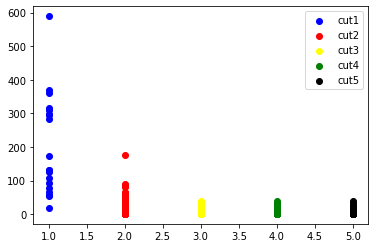

In [147]:
fig=plt.figure()
len(cut_list[key])
fig, ax = plt.subplots()
ax.scatter([1]*len(cut_N_list[1]), cut_N_list[1],color='blue', label='cut1')
ax.scatter([2]*len(cut_N_list[2]), cut_N_list[2],color='red', label='cut2')
ax.scatter([3]*len(cut_N_list[3]), cut_N_list[3],color='yellow', label='cut3')
ax.scatter([4]*len(cut_N_list[4]), cut_N_list[4],color='green', label='cut4')
ax.scatter([5]*len(cut_N_list[5]), cut_N_list[5],color='black', label='cut5')



plt.legend()
plt.show()

In [206]:

cut_C_list={
    1:list(df_1_C['count']),
    2:list(df_2_C['count']),
    3:list(df_3_C['count']),
    4:list(df_4_C['count']),
    5:list(df_5_C['count']),
}


<Figure size 432x288 with 0 Axes>

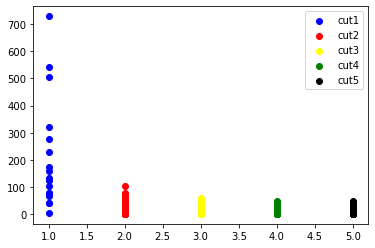

In [149]:
fig=plt.figure()
len(cut_list[key])
fig, ax = plt.subplots()
ax.scatter([1]*len(cut_C_list[1]), cut_C_list[1],color='blue', label='cut1')
ax.scatter([2]*len(cut_C_list[2]), cut_C_list[2],color='red', label='cut2')
ax.scatter([3]*len(cut_C_list[3]), cut_C_list[3],color='yellow', label='cut3')
ax.scatter([4]*len(cut_C_list[4]), cut_C_list[4],color='green', label='cut4')
ax.scatter([5]*len(cut_C_list[5]), cut_C_list[5],color='black', label='cut5')



plt.legend()
plt.show()

<Figure size 432x288 with 0 Axes>

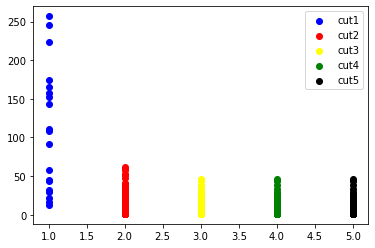

In [162]:
#inf
fig=plt.figure()
len(cut_list[key])
fig, ax = plt.subplots()
ax.scatter([1]*len(cut_N_list[1]), cut_N_list[1],color='blue', label='cut1')
ax.scatter([2]*len(cut_N_list[2]), cut_N_list[2],color='red', label='cut2')
ax.scatter([3]*len(cut_N_list[3]), cut_N_list[3],color='yellow', label='cut3')
ax.scatter([4]*len(cut_N_list[4]), cut_N_list[4],color='green', label='cut4')
ax.scatter([5]*len(cut_N_list[5]), cut_N_list[5],color='black', label='cut5')



plt.legend()
plt.show()

<Figure size 432x288 with 0 Axes>

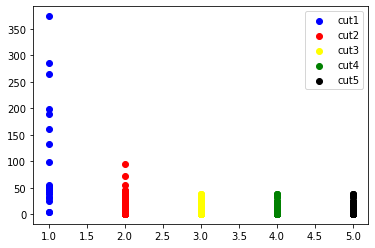

In [163]:
fig=plt.figure()
len(cut_list[key])
fig, ax = plt.subplots()
ax.scatter([1]*len(cut_C_list[1]), cut_C_list[1],color='blue', label='cut1')
ax.scatter([2]*len(cut_C_list[2]), cut_C_list[2],color='red', label='cut2')
ax.scatter([3]*len(cut_C_list[3]), cut_C_list[3],color='yellow', label='cut3')
ax.scatter([4]*len(cut_C_list[4]), cut_C_list[4],color='green', label='cut4')
ax.scatter([5]*len(cut_C_list[5]), cut_C_list[5],color='black', label='cut5')



plt.legend()
plt.show()

<Figure size 432x288 with 0 Axes>

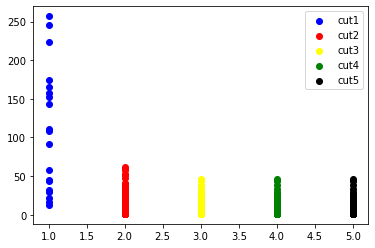

In [170]:

fig=plt.figure()
len(cut_list[key])
fig, ax = plt.subplots()
ax.scatter([1]*len(cut_N_list[1]), cut_N_list[1],color='blue', label='cut1')
ax.scatter([2]*len(cut_N_list[2]), cut_N_list[2],color='red', label='cut2')
ax.scatter([3]*len(cut_N_list[3]), cut_N_list[3],color='yellow', label='cut3')
ax.scatter([4]*len(cut_N_list[4]), cut_N_list[4],color='green', label='cut4')
ax.scatter([5]*len(cut_N_list[5]), cut_N_list[5],color='black', label='cut5')



plt.legend()
plt.show()

<Figure size 432x288 with 0 Axes>

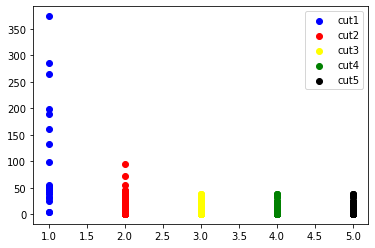

In [171]:
fig=plt.figure()
len(cut_list[key])
fig, ax = plt.subplots()
ax.scatter([1]*len(cut_C_list[1]), cut_C_list[1],color='blue', label='cut1')
ax.scatter([2]*len(cut_C_list[2]), cut_C_list[2],color='red', label='cut2')
ax.scatter([3]*len(cut_C_list[3]), cut_C_list[3],color='yellow', label='cut3')
ax.scatter([4]*len(cut_C_list[4]), cut_C_list[4],color='green', label='cut4')
ax.scatter([5]*len(cut_C_list[5]), cut_C_list[5],color='black', label='cut5')



plt.legend()
plt.show()

<Figure size 432x288 with 0 Axes>

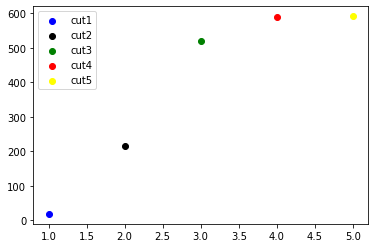

In [177]:
#inf
fig=plt.figure()
len(cut_list[key])
fig, ax = plt.subplots()
ax.scatter(([1]), len(cut_N_list[1]),color='blue', label='cut1')
ax.scatter(([2]), len(cut_N_list[2]),color='black', label='cut2')
ax.scatter(([3]), len(cut_N_list[3]),color='green', label='cut3')
ax.scatter(([4]), len(cut_N_list[4]),color='red', label='cut4')
ax.scatter(([5]), len(cut_N_list[5]),color='yellow', label='cut5')



plt.legend()
plt.show()

<Figure size 432x288 with 0 Axes>

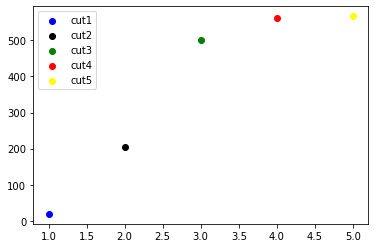

In [179]:
#inf
fig=plt.figure()
len(cut_list[key])
fig, ax = plt.subplots()
ax.scatter(([1]), len(cut_C_list[1]),color='blue', label='cut1')
ax.scatter(([2]), len(cut_C_list[2]),color='black', label='cut2')
ax.scatter(([3]), len(cut_C_list[3]),color='green', label='cut3')
ax.scatter(([4]), len(cut_C_list[4]),color='red', label='cut4')
ax.scatter(([5]), len(cut_C_list[5]),color='yellow', label='cut5')



plt.legend()
plt.show()

<Figure size 432x288 with 0 Axes>

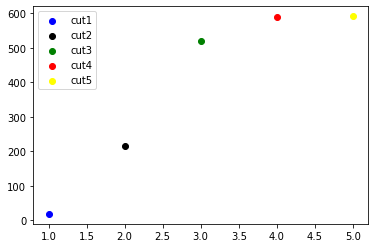

In [188]:
#inf
fig=plt.figure()
len(cut_list[key])
fig, ax = plt.subplots()
ax.scatter(([1]), len(cut_N_list[1]),color='blue', label='cut1')
ax.scatter(([2]), len(cut_N_list[2]),color='black', label='cut2')
ax.scatter(([3]), len(cut_N_list[3]),color='green', label='cut3')
ax.scatter(([4]), len(cut_N_list[4]),color='red', label='cut4')
ax.scatter(([5]), len(cut_N_list[5]),color='yellow', label='cut5')



plt.legend()
plt.show()

<Figure size 432x288 with 0 Axes>

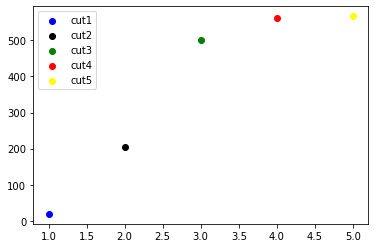

In [189]:
#inf
fig=plt.figure()
len(cut_list[key])
fig, ax = plt.subplots()
ax.scatter(([1]), len(cut_C_list[1]),color='blue', label='cut1')
ax.scatter(([2]), len(cut_C_list[2]),color='black', label='cut2')
ax.scatter(([3]), len(cut_C_list[3]),color='green', label='cut3')
ax.scatter(([4]), len(cut_C_list[4]),color='red', label='cut4')
ax.scatter(([5]), len(cut_C_list[5]),color='yellow', label='cut5')



plt.legend()
plt.show()

<Figure size 432x288 with 0 Axes>

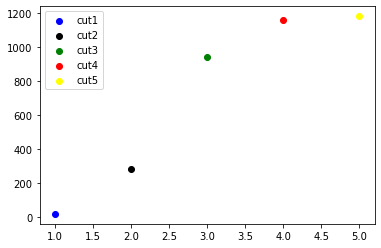

In [207]:
#WF
fig=plt.figure()
len(cut_list[key])
fig, ax = plt.subplots()
ax.scatter(([1]), len(cut_N_list[1]),color='blue', label='cut1')
ax.scatter(([2]), len(cut_N_list[2]),color='black', label='cut2')
ax.scatter(([3]), len(cut_N_list[3]),color='green', label='cut3')
ax.scatter(([4]), len(cut_N_list[4]),color='red', label='cut4')
ax.scatter(([5]), len(cut_N_list[5]),color='yellow', label='cut5')



plt.legend()
plt.show()

<Figure size 432x288 with 0 Axes>

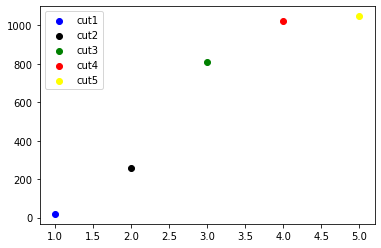

In [208]:
#WF
fig=plt.figure()
len(cut_list[key])
fig, ax = plt.subplots()
ax.scatter(([1]), len(cut_C_list[1]),color='blue', label='cut1')
ax.scatter(([2]), len(cut_C_list[2]),color='black', label='cut2')
ax.scatter(([3]), len(cut_C_list[3]),color='green', label='cut3')
ax.scatter(([4]), len(cut_C_list[4]),color='red', label='cut4')
ax.scatter(([5]), len(cut_C_list[5]),color='yellow', label='cut5')



plt.legend()
plt.show()

In [136]:

mapp='WF'
files = os.listdir(mapp)
# gets all xlsx files in cwd
files_xlsx = [f for f in files if f[-4:] == 'xlsx']
df = pd.DataFrame()

data = pd.read_excel(mapp+ '/' +'peptide _WF1.xlsx', 'peptide')
total_number_of_peptides+=len(data.index)
data = data.loc[(data['#Feature'] >= 4)] # sorts out if feature<4
data['Peptide']=data['Peptide'].str.replace('[^a-zA-Z]','')
data['count']=1
data = data.groupby(['Peptide'], as_index=False).sum()
print(len(data['Peptide']))
data['count'] = 1

data1 = pd.read_excel(mapp+ '/' +'peptide _WF1.xlsx', 'peptide')
total_number_of_peptides+=len(data.index)
data1 = data1.loc[(data1['#Feature'] >= 4)] # sorts out if feature<4
data1['Peptide']=data1['Peptide'].str.replace('[^a-zA-Z]','')
data1['count']=1
data1['Accession'].fillna("Not available", inplace = True) 
data1 = data1.groupby(['Peptide','Accession'], as_index=False).sum()
print(len(data1['Peptide']))
data1['count'] = 1

merge=data1.merge(data, how='outer', indicator=True)
merge.loc[(merge['_merge']!='both')]

811
Index(['Peptide', '-10lgP', 'Mass', 'Length', 'ppm', 'm/z', 'RT', 'Area WF1',
       'Fraction', '#Feature', '#Feature WF1', 'count'],
      dtype='object')
811


Empty DataFrame
Columns: [Peptide, Accession, -10lgP, Mass, Length, ppm, m/z, RT, Area WF1, Fraction, #Feature, #Feature WF1, count, _merge]
Index: []

In [112]:
df2=df.copy()
df.groupby()
df2

Peptide                                Accession  -10lgP  \
0      AAGSDVDIDMAFILDSAETT                    sp|P12111|CO6A3_HUMAN   61.04   
1      AALLSPYSYSTTAVVTNPKE                     sp|P02766|TTHY_HUMAN   85.56   
2    AAMSTYTGIFTDQVLSVLKGEE                    sp|P02655|APOC2_HUMAN   85.25   
3                 AASQAALGL                     sp|P02768|ALBU_HUMAN   49.02   
4                 AAWIDSVLA                     sp|P00746|CFAD_HUMAN   47.32   
..                      ...                                      ...     ...   
797                 YPWTQRF  sp|P68871|HBB_HUMAN:sp|P02042|HBD_HUMAN   45.51   
798           YQGAIRQIDDIDV                     sp|P04114|APOB_HUMAN   51.08   
799               YQKSTELLI                      sp|Q71DI3|H32_HUMAN   41.45   
800       YQKVVAGVANALAHKYH  sp|P68871|HBB_HUMAN:sp|P02042|HBD_HUMAN   58.64   
801       YTGIFTDQVLSVLKGEE                    sp|P02655|APOC2_HUMAN   68.50   

          Mass  Length  ppm        m/z      RT    Area WF1  Fraction  ...  \
0    2056.9146    20.0  4.6  1029.4692  109.31    892000.0         4  ...   
1    2111.0786    20.0  2.0  1056.5487   75.48  70100000.0         3  ...   
2    2375.1565    22.0  2.2  1188.5881  113.66  42600000.0         4  ...   
3     800.4392     9.0  0.0   401.2269   37.79  18300000.0         3  ...   
4     944.4967     9.0  0.7   473.2560  106.09    701000.0         3  ...   
..         ...     ...  ...        ...     ...         ...       ...  ...   
797   996.4818     7.0  1.6   499.2490   55.28         NaN        18  ...   
798  1504.7521    13.0  5.5   753.3875   63.75         NaN        20  ...   
799  1093.6019     9.0  3.0   547.8099   38.71         NaN        18  ...   
800  1868.0056    17.0  1.8   623.6769   30.13         NaN        19  ...   
801  1897.9673    17.0  3.1   949.9939  111.04         NaN        17  ...   

     #Feature WF1  count  Area WF2  #Feature WF2  Area WF 3  #Feature WF 3  \
0             4.0      1       NaN           NaN        NaN            NaN   
1             8.0      1       NaN           NaN        NaN            NaN   
2             7.0      1       NaN           NaN        NaN            NaN   
3             4.0      1       NaN           NaN        NaN            NaN   
4             4.0      1       NaN           NaN        NaN            NaN   
..            ...    ...       ...           ...        ...            ...   
797           NaN      1       NaN           NaN        NaN            NaN   
798           NaN      1       NaN           NaN        NaN            NaN   
799           NaN      1       NaN           NaN        NaN            NaN   
800           NaN      1       NaN           NaN        NaN            NaN   
801           NaN      1       NaN           NaN        NaN            NaN   

     Area WF4  #Feature WF4    Area WF5  #Feature WF5  
0         NaN           NaN         NaN           NaN  
1         NaN           NaN         NaN           NaN  
2         NaN           NaN         NaN           NaN  
3         NaN           NaN         NaN           NaN  
4         NaN           NaN         NaN           NaN  
..        ...           ...         ...           ...  
797       NaN           NaN  22500000.0           4.0  
798       NaN           NaN   1850000.0           4.0  
799       NaN           NaN   1800000.0           4.0  
800       NaN           NaN  58100000.0           5.0  
801       NaN           NaN   6560000.0           5.0  

[3860 rows x 21 columns]

Hej


In [116]:
df2=df2.groupby(["Accession","Peptide"])['#Feature','count'].sum()
df2=df2.reset_index('Accession')
#df2.sort_values(ascending=False)
df2[df2.index.duplicated(keep=False)]

C:\Users\erikh\anaconda3\envs\excelanalysis\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Accession  #Feature  \
Peptide                                                                         
AVPSGASTGIYEALEL                               sp|P06733|ENOA_HUMAN         4   
AVPSGASTGIYEALEL          sp|P06733|ENOA_HUMAN:sp|P13929|ENOB_HUMAN         5   
IQLVEEELDR                sp|P07951|TPM2_HUMAN:sp|P09493|TPM1_HUMAN         4   
IQLVEEELDR                sp|P09493|TPM1_HUMAN:sp|P07951|TPM2_HUMAN         8   
GLEEELQF                                       sp|P0C0L4|CO4A_HUMAN        12   
...                                                             ...       ...   
GGVLPNIQAV                                    sp|Q8IUE6|H2A2B_HUMAN         4   
TIAQGGVLPNIQAV                                sp|Q8IUE6|H2A2B_HUMAN         4   
AGLQFPVGR         sp|Q8IUE6|H2A2B_HUMAN:sp|P0C0S5|H2AZ_HUMAN:sp|...         4   
GLQFPVGR          sp|Q8IUE6|H2A2B_HUMAN:sp|P0C0S5|H2AZ_HUMAN:sp|...         4   
FKLLPQLT                                      sp|Q92688|AN32B_HUMAN         4   

                  count  
Peptide                  
AVPSGASTGIYEALEL      1  
AVPSGASTGIYEALEL      1  
IQLVEEELDR            1  
IQLVEEELDR            2  
GLEEELQF              3  
...                 ...  
GGVLPNIQAV            1  
TIAQGGVLPNIQAV        1  
AGLQFPVGR             1  
GLQFPVGR              1  
FKLLPQLT              1  

[80 rows x 3 columns]

## Create table of known/found sequences

In [161]:
mapp='peptide_sample_inf'
files = os.listdir(mapp)
# gets all xlsx files in cwd
files_xlsx = [f for f in files if f[-4:] == 'xlsx']
df_inf = pd.DataFrame()
for file in files_xlsx:
    data = pd.read_excel(mapp+ '/' +file, 'peptide')
    data = data.loc[(data['#Feature'] >= 4)] # sorts out if feature<4
    data['Peptide']=data['Peptide'].str.replace('[^a-zA-Z]','')
    data = data.groupby(['Peptide','Accession'], as_index=False).sum()
    df_inf = df_inf.append(data)  # appends all data

filename='reftest.xlsx'
sheetname='Sheet1'
df_ref=pd.read_excel(filename, sheet_name=sheetname)

df_ref

Unnamed: 0    Peptide
0           0  ANALAHKYH

In [162]:
df_ref

Unnamed: 0    Peptide
0           0  ANALAHKYH

In [174]:
result=[]
for seq1 in df_ref['Peptide']:
    for seq2 in df_inf['Peptide']:
        if seq1 in seq2 and len(seq2)<(len(seq1)+4):
            result.append((seq1,seq2))

                          
from openpyxl import load_workbook

result=pd.DataFrame(result)
result.columns = ['ref', 'inf']
result.drop_duplicates('inf', inplace=True)
result
with pd.ExcelWriter(filename, engine='openpyxl') as writer:
    writer.book = load_workbook(filename)
    result.to_excel(writer, sheetname , columns=[0,1])

ref           inf
0  ANALAHKYH  AGVANALAHKYH
1  ANALAHKYH     ANALAHKYH
2  ANALAHKYH   GVANALAHKYH
3  ANALAHKYH    VANALAHKYH

In [97]:

mapp='peptide_sample_ninf'
files = os.listdir(mapp)
# gets all xlsx files in cwd
files_xlsx = [f for f in files if f[-4:] == 'xlsx']
df = pd.DataFrame()

number_of_files=0
for file in files_xlsx:
    number_of_files+=1
    data = pd.read_excel(mapp+ '/' +file, 'peptide')
    data['Accession'].fillna('Not available', inplace=True)
    data['Peptide']=data['Peptide'].str.replace('[^a-zA-Z]','')
    df = df.append(data)  # appends all data


df['count'] = 1
df = df.loc[(df['#Feature'] >= 4)]
df = df.groupby(['Accession','Peptide']).sum()
df.reset_index(['Peptide'], inplace=True)

df=df.sort_values('Peptide')
df

Peptide  -10lgP  \
Accession                                                              
sp|P69905|HBA_HUMAN                              AAHLPAEFTPA   40.41   
sp|P69905|HBA_HUMAN                             AAHLPAEFTPAV   45.77   
sp|P69905|HBA_HUMAN                            AAHLPAEFTPAVH   49.86   
sp|P69905|HBA_HUMAN                           AAHLPAEFTPAVHA   96.09   
sp|P69905|HBA_HUMAN                      AAHLPAEFTPAVHASLDKF   62.14   
...                                                      ...     ...   
sp|P02655|APOC2_HUMAN                              YLPAVDEKL   34.10   
sp|P02768|ALBU_HUMAN                                 YLYEIAR   94.80   
sp|P68871|HBB_HUMAN:sp|P02042|HBD_HUMAN              YPWTQRF   33.65   
sp|P68871|HBB_HUMAN:sp|P02042|HBD_HUMAN    YQKVVAGVANALAHKYH   62.30   
sp|P02766|TTHY_HUMAN                            YSTTAVVTNPKE   94.80   

                                              Mass  Length           ppm  \
Accession                                                                  
sp|P69905|HBA_HUMAN                      1123.5662      11  3.200000e+00   
sp|P69905|HBA_HUMAN                      1222.6345      12  3.100000e+00   
sp|P69905|HBA_HUMAN                      1359.6935      13  1.800000e+00   
sp|P69905|HBA_HUMAN                      2861.4612      28  1.400000e+00   
sp|P69905|HBA_HUMAN                      2021.0370      19  3.000000e-01   
...                                            ...     ...           ...   
sp|P02655|APOC2_HUMAN                    1046.5648       9  1.000000e+00   
sp|P02768|ALBU_HUMAN                     2779.4583      21 -2.775558e-17   
sp|P68871|HBB_HUMAN:sp|P02042|HBD_HUMAN   996.4818       7  1.300000e+00   
sp|P68871|HBB_HUMAN:sp|P02042|HBD_HUMAN  1868.0056      17  4.000000e-01   
sp|P02766|TTHY_HUMAN                     2617.3122      24  4.000000e+00   

                                               m/z      RT  Area Sample 13  \
Accession                                                                    
sp|P69905|HBA_HUMAN                       562.7922   71.87             0.0   
sp|P69905|HBA_HUMAN                       612.3264   85.53             0.0   
sp|P69905|HBA_HUMAN                       454.2393   68.48             0.0   
sp|P69905|HBA_HUMAN                       955.8356  170.27       1690000.0   
sp|P69905|HBA_HUMAN                       506.2667  106.76             0.0   
...                                            ...     ...             ...   
sp|P02655|APOC2_HUMAN                     524.2902   75.79             0.0   
sp|P02768|ALBU_HUMAN                     1392.7510  224.67      24100000.0   
sp|P68871|HBB_HUMAN:sp|P02042|HBD_HUMAN   499.2488  113.01             0.0   
sp|P68871|HBB_HUMAN:sp|P02042|HBD_HUMAN   468.0089   75.34       4770000.0   
sp|P02766|TTHY_HUMAN                     1310.6733  108.44       4290000.0   

                                         Fraction  #Feature  \
Accession                                                     
sp|P69905|HBA_HUMAN                            33         4   
sp|P69905|HBA_HUMAN                            33         4   
sp|P69905|HBA_HUMAN                            33         4   
sp|P69905|HBA_HUMAN                            38        10   
sp|P69905|HBA_HUMAN                            36         6   
...                                           ...       ...   
sp|P02655|APOC2_HUMAN                          33         4   
sp|P02768|ALBU_HUMAN                           46        12   
sp|P68871|HBB_HUMAN:sp|P02042|HBD_HUMAN        33         6   
sp|P68871|HBB_HUMAN:sp|P02042|HBD_HUMAN         3         4   
sp|P02766|TTHY_HUMAN                            8         8   

                                         #Feature Sample 13  Area Sample 21  \
Accession                                                                     
sp|P69905|HBA_HUMAN                                     0.0             0.0   
sp|P69905|HBA_HUMAN                                    

In [98]:
df=df.drop_duplicates(subset='Peptide')
df

Peptide  -10lgP  \
Accession                                                              
sp|P69905|HBA_HUMAN                              AAHLPAEFTPA   40.41   
sp|P69905|HBA_HUMAN                             AAHLPAEFTPAV   45.77   
sp|P69905|HBA_HUMAN                            AAHLPAEFTPAVH   49.86   
sp|P69905|HBA_HUMAN                           AAHLPAEFTPAVHA   96.09   
sp|P69905|HBA_HUMAN                      AAHLPAEFTPAVHASLDKF   62.14   
...                                                      ...     ...   
sp|P02655|APOC2_HUMAN                              YLPAVDEKL   34.10   
sp|P02768|ALBU_HUMAN                                 YLYEIAR   94.80   
sp|P68871|HBB_HUMAN:sp|P02042|HBD_HUMAN              YPWTQRF   33.65   
sp|P68871|HBB_HUMAN:sp|P02042|HBD_HUMAN    YQKVVAGVANALAHKYH   62.30   
sp|P02766|TTHY_HUMAN                            YSTTAVVTNPKE   94.80   

                                              Mass  Length           ppm  \
Accession                                                                  
sp|P69905|HBA_HUMAN                      1123.5662      11  3.200000e+00   
sp|P69905|HBA_HUMAN                      1222.6345      12  3.100000e+00   
sp|P69905|HBA_HUMAN                      1359.6935      13  1.800000e+00   
sp|P69905|HBA_HUMAN                      2861.4612      28  1.400000e+00   
sp|P69905|HBA_HUMAN                      2021.0370      19  3.000000e-01   
...                                            ...     ...           ...   
sp|P02655|APOC2_HUMAN                    1046.5648       9  1.000000e+00   
sp|P02768|ALBU_HUMAN                     2779.4583      21 -2.775558e-17   
sp|P68871|HBB_HUMAN:sp|P02042|HBD_HUMAN   996.4818       7  1.300000e+00   
sp|P68871|HBB_HUMAN:sp|P02042|HBD_HUMAN  1868.0056      17  4.000000e-01   
sp|P02766|TTHY_HUMAN                     2617.3122      24  4.000000e+00   

                                               m/z      RT  Area Sample 13  \
Accession                                                                    
sp|P69905|HBA_HUMAN                       562.7922   71.87             0.0   
sp|P69905|HBA_HUMAN                       612.3264   85.53             0.0   
sp|P69905|HBA_HUMAN                       454.2393   68.48             0.0   
sp|P69905|HBA_HUMAN                       955.8356  170.27       1690000.0   
sp|P69905|HBA_HUMAN                       506.2667  106.76             0.0   
...                                            ...     ...             ...   
sp|P02655|APOC2_HUMAN                     524.2902   75.79             0.0   
sp|P02768|ALBU_HUMAN                     1392.7510  224.67      24100000.0   
sp|P68871|HBB_HUMAN:sp|P02042|HBD_HUMAN   499.2488  113.01             0.0   
sp|P68871|HBB_HUMAN:sp|P02042|HBD_HUMAN   468.0089   75.34       4770000.0   
sp|P02766|TTHY_HUMAN                     1310.6733  108.44       4290000.0   

                                         Fraction  #Feature  \
Accession                                                     
sp|P69905|HBA_HUMAN                            33         4   
sp|P69905|HBA_HUMAN                            33         4   
sp|P69905|HBA_HUMAN                            33         4   
sp|P69905|HBA_HUMAN                            38        10   
sp|P69905|HBA_HUMAN                            36         6   
...                                           ...       ...   
sp|P02655|APOC2_HUMAN                          33         4   
sp|P02768|ALBU_HUMAN                           46        12   
sp|P68871|HBB_HUMAN:sp|P02042|HBD_HUMAN        33         6   
sp|P68871|HBB_HUMAN:sp|P02042|HBD_HUMAN         3         4   
sp|P02766|TTHY_HUMAN                            8         8   

                                         #Feature Sample 13  Area Sample 21  \
Accession                                                                     
sp|P69905|HBA_HUMAN                                     0.0             0.0   
sp|P69905|HBA_HUMAN                                    

In [99]:

filename='heatmap_2.xlsx'
sheetname='ninf'
df_ref=pd.read_excel(filename, sheet_name=sheetname)

from openpyxl import load_workbook

with pd.ExcelWriter(filename, engine='openpyxl') as writer:
    writer.book = load_workbook(filename)
    df.to_excel(writer, sheetname)

## For Kalle Proteasix


In [12]:

mapp='protein-peptide_sample_inf'
files = os.listdir(mapp)
# gets all xlsx files in cwd
files_xlsx = [f for f in files if f[-4:] == 'xlsx']
df = pd.DataFrame()

number_of_files=0
for file in files_xlsx:
    number_of_files+=1
    data = pd.read_excel(mapp+ '/' +file)
    data['Protein Accession'].fillna('Not available', inplace=True)
    data['Peptide']=data['Peptide'].str.replace('[^a-zA-Z]','')
    df = df.append(data)  # appends all data


df['count'] = 1
df = df.loc[(df['#Feature'] >= 4)]
df = df.groupby(['Protein Accession','Peptide']).sum()
df.reset_index(['Peptide'], inplace=True)

df=df.sort_values('Peptide')
df[0:30]

Peptide  Protein Group  \
Protein Accession                                                           
sp|P16403|H12_HUMAN                              AAGYDVEKN             28   
sp|P69905|HBA_HUMAN                           AAHLPAEFTPAV              2   
sp|P69905|HBA_HUMAN                          AAHLPAEFTPAVH              2   
sp|P69905|HBA_HUMAN                         AAHLPAEFTPAVHA              2   
sp|P69905|HBA_HUMAN                        AAHLPAEFTPAVHAS              2   
sp|P69905|HBA_HUMAN                   AAHLPAEFTPAVHASLDKFL              2   
sp|P69905|HBA_HUMAN               AAHLPAEFTPAVHASLDKFLASVS              1   
sp|P69905|HBA_HUMAN             AAHLPAEFTPAVHASLDKFLASVSTV              1   
sp|P69905|HBA_HUMAN            AAHLPAEFTPAVHASLDKFLASVSTVL              1   
sp|P69905|HBA_HUMAN       AAHLPAEFTPAVHASLDKFLASVSTVLTSKYR              1   
sp|P02765|FETUA_HUMAN                            AAPPGHQLH             21   
sp|P02768|ALBU_HUMAN                             AASQAALGL             25   
sp|P69905|HBA_HUMAN                             AAWGKVGAHA              2   
sp|P69905|HBA_HUMAN                            AAWGKVGAHAG              1   
sp|P69905|HBA_HUMAN                          AAWGKVGAHAGEY              1   
sp|P69905|HBA_HUMAN                         AAWGKVGAHAGEYG              2   
sp|P69905|HBA_HUMAN                  AAWGKVGAHAGEYGAEALERM              1   
sp|P69905|HBA_HUMAN                 AAWGKVGAHAGEYGAEALERMF              3   
sp|P68871|HBB_HUMAN                          AAYQKVVAGVANA              2   
sp|P02042|HBD_HUMAN                          AAYQKVVAGVANA              3   
sp|P02042|HBD_HUMAN                    AAYQKVVAGVANALAHKYH              6   
sp|P68871|HBB_HUMAN                    AAYQKVVAGVANALAHKYH              4   
sp|P69905|HBA_HUMAN                            ADALTNAVAHV              3   
sp|P69905|HBA_HUMAN                           ADALTNAVAHVD              3   
sp|P69905|HBA_HUMAN                      ADALTNAVAHVDDMPNA              1   
sp|P69905|HBA_HUMAN                    ADALTNAVAHVDDMPNALS              1   
sp|P69905|HBA_HUMAN                 ADALTNAVAHVDDMPNALSALS              3   
sp|P69905|HBA_HUMAN    ADALTNAVAHVDDMPNALSALSDLHAHKLRVDPVN              2   
sp|P02671|FIBA_HUMAN                    ADEAGSEADHEGTHSTKR              4   
sp|P02671|FIBA_HUMAN                     ADSGEGDFLAEGGGVRG             12   

                       Protein ID  -10lgP       Mass  Length   ppm        m/z  \
Protein Accession                                                               
sp|P16403|H12_HUMAN        138016   29.55   780.3654       7   2.8   391.1910   
sp|P69905|HBA_HUMAN        275952   70.62  2105.0582      20   0.9  1054.5440   
sp|P69905|HBA_HUMAN        275952   85.11  2303.1948      22   3.3  1153.6139   
sp|P69905|HBA_HUMAN        275952  110.15  2577.3128      24   1.6   861.1195   
sp|P69905|HBA_HUMAN        275952   99.43  2719.3870      26   7.3  1135.0970   
sp|P69905|HBA_HUMAN        275952  124.15  3899.9998      36   1.5  1139.5154   
sp|P69905|HBA_HUMAN        137976   45.93  2320.2214      22   3.8   581.0648   
sp|P69905|HBA_HUMAN        137976   47.98  2508.3013      24   0.7   628.0830   
sp|P69905|HBA_HUMAN        137976   46.22  2607.3696      25   1.5   652.8506   
sp|P69905|HBA_HUMAN        137976   64.24  3355.7927      31   2.0   672.1672   
sp|P02765|FETUA_HUMAN      138075   26.89   718.3762       7   2.3   360.1962   
sp|P02768|ALBU_HUMAN       413961  102.26  2188.2063      24   2.8  1097.1261   
sp|P69905|HBA_HUMAN        275952   76.39  1648.8586      16  -1.6   826.4432   
sp|P69905|HBA_HUMAN        137976   41.31   895.4664       9   2.4   448.7416   
sp|P69905|HBA_HUMAN        137976   37.06  1081.5305      11   1.2   541.7732   
sp|P69905|HBA_HUMAN        275952   98.45  2489.1876      24   0.2  1246.6084   
sp|P69905|HBA_HUMAN        137976   71.20  1970.9598      19   2.8   657.9957   
sp|P69905|HBA_HUMAN        413928  176.80  6337

In [13]:
df.reset_index(['Protein Accession'], inplace=True)
df_HBB= df.loc[(df['Protein Accession'] == 'sp|P68871|HBB_HUMAN')]
df_HBB.drop_duplicates('Peptide')

Protein Accession              Peptide  Protein Group  Protein ID  \
18    sp|P68871|HBB_HUMAN        AAYQKVVAGVANA              2      137975   
21    sp|P68871|HBB_HUMAN  AAYQKVVAGVANALAHKYH              4      275950   
36    sp|P68871|HBB_HUMAN            AFSDGLAHL              2      137975   
38    sp|P68871|HBB_HUMAN          AFSDGLAHLDN              2      137975   
40    sp|P68871|HBB_HUMAN       AFSDGLAHLDNLKG              4      275950   
...                   ...                  ...            ...         ...   
1783  sp|P68871|HBB_HUMAN  WTQRFFESFGDLSTPDAVM              2      137975   
1817  sp|P68871|HBB_HUMAN         YPWTQRFFESFG              4      275950   
1820  sp|P68871|HBB_HUMAN        YQKVVAGVANALA              2      137975   
1822  sp|P68871|HBB_HUMAN      YQKVVAGVANALAHK              2      137975   
1824  sp|P68871|HBB_HUMAN    YQKVVAGVANALAHKYH              2      137975   

      -10lgP       Mass  Length  ppm        m/z  z  ...  Fraction  #Feature  \
18     49.95  1118.6084      11  2.1   560.3126  2  ...        58         4   
21    148.96  3878.0854      36  3.2  1133.1247  7  ...        66        43   
36     35.04   745.3395       7  1.2   373.6775  2  ...        57         4   
38     34.54   973.4505       9  4.6   487.7347  2  ...        58         4   
40     96.27  2657.3448      24  1.1  1109.2422  5  ...        71         8   
...      ...        ...     ...  ...        ... ..  ...       ...       ...   
1783   51.79  1915.8951      17  3.7   639.6414  3  ...        57         5   
1817  109.21  2687.2598      20  0.3  1345.6447  4  ...        67        11   
1820   45.78  1068.6292      11  2.3   535.3231  2  ...         9         4   
1822   33.25  1276.7251      13 -0.1   639.3698  2  ...        11         4   
1824   65.09  1704.9424      16  0.9   569.3219  3  ...        58         7   

      #Feature Sample 31  Start  End  Area Sample 34  #Feature Sample 34  \
18                   0.0    130  140             0.0                 0.0   
21                   8.0    260  294             0.0                 0.0   
36                   0.0     72   78             0.0                 0.0   
38                   0.0     72   80             0.0                 0.0   
40                   4.0    144  166             0.0                 0.0   
...                  ...    ...  ...             ...                 ...   
1783                 0.0     39   55             0.0                 0.0   
1817                 7.0     74   92             0.0                 0.0   
1820                 4.0    132  142             0.0                 0.0   
1822                 4.0    132  144             0.0                 0.0   
1824                 0.0    132  147             0.0                 0.0   

      Area Sample 39  #Feature Sample 39  count  
18          712000.0                 4.0      1  
21       367000000.0                35.0      2  
36         3610000.0                 4.0      1  
38         2150000.0                 4.0      1  
40         5850000.0                 4.0      2  
...              ...                 ...    ...  
1783       7040000.0                 5.0      1  
1817       1900000.0                 4.0      2  
1820             0.0                 0.0      1  
1822             0.0                 0.0      1  
1824      25600000.0                 7.0      1  

[332 rows x 22 columns]

In [22]:
region=111
df_HBB= df_HBB.loc[(df['Start'] >= region)]
df_HBB[['Protein Accession', 'Peptide','Start','End']]

Protein Accession              Peptide  #Feature  Start  End
18    sp|P68871|HBB_HUMAN        AAYQKVVAGVANA         4    130  140
21    sp|P68871|HBB_HUMAN  AAYQKVVAGVANALAHKYH        43    260  294
40    sp|P68871|HBB_HUMAN       AFSDGLAHLDNLKG         8    144  166
42    sp|P68871|HBB_HUMAN   AFSDGLAHLDNLKGTFAT        11    144  174
67    sp|P68871|HBB_HUMAN           AGVANALAHK         4    137  144
...                   ...                  ...       ...    ...  ...
1718  sp|P68871|HBB_HUMAN        VVAGVANALAHKY        13    270  290
1720  sp|P68871|HBB_HUMAN       VVAGVANALAHKYH        53    405  441
1820  sp|P68871|HBB_HUMAN        YQKVVAGVANALA         4    132  142
1822  sp|P68871|HBB_HUMAN      YQKVVAGVANALAHK         4    132  144
1824  sp|P68871|HBB_HUMAN    YQKVVAGVANALAHKYH         7    132  147

[105 rows x 5 columns]

In [62]:
files = os.listdir('protein-peptide_sample_inf')
files_xls = [f for f in files if f[-3:] == 'lsx']

df_inf = pd.DataFrame()
for f in files_xls:
    data = pd.read_excel('protein-peptide_sample_inf' + '/' + f)
    ## sortera bort om feature<4
    data = data.loc[(data['#Feature'] >= 4)]
    ## Tar bort allt ur kolummn som inte är bokstäver + ta bort upp och nedströms AA
    data['Peptide']= data['Peptide'].str.replace('\d+', '')
    data['Peptide']= data['Peptide'].str.replace(r'\(\+\.\)', '')
    data['Peptide']= data['Peptide'].apply(lambda x: x.split('.')[1] if x[1]=='.' else x.split('.')[0] if (x[1]!='.' and x[-2]=='.') else x)
    data['count'] = 1
    data = data.groupby(by=['Peptide', 'Protein Accession'], as_index=False).sum()
    data['End'] = data['End']/ data['count']
    data['Start'] = data['Start']/ data['count']
    df_inf = df_inf.append(data)
    
df_inf['count']=1
df_inf.reset_index(inplace=True, drop=True)
df_inf= df_inf.loc[(df_inf['Protein Accession'] == 'sp|P68871|HBB_HUMAN')]
df_inf= df_inf.loc[(df_inf['Start'] >=111)]
df_inf=df_inf.groupby(df_inf['Peptide']).sum()
df_inf.reset_index(inplace=True, drop=True)
df_inf['End']=df_inf['End']/df_inf['count']
df_inf['Start']=df_inf['Start']/df_inf['count']
df_inf=df_inf.drop(columns='count')

df_inf[0:10]

Protein Group  Protein ID  -10lgP       Mass  Length  ppm        m/z  z  \
0              2      137975   75.92  2010.0798      19  2.6   671.0356  3   
1              2      137975   35.62  1113.5930      11  1.2   372.2054  3   
2              8      551900  245.00  5003.5920      48  8.1  2505.8303  8   
3              2      137975   34.90  1365.6829      12 -0.5   683.8484  2   
4              2      137975   47.63  3485.8108      32  0.8   581.9762  6   
5              4      275950   91.67  1676.8898      14 -0.2   840.4594  4   
6              8      551900  198.72  4095.0840      36  6.3  2051.5744  8   
7              2      137975   49.95  1118.6084      11  2.1   560.3126  2   
8              4      275950  148.96  3878.0854      36  3.2  1133.1247  7   
9              2      137975   52.97  1476.7612      13  6.2   739.3925  2   

       RT  Area Sample 31  Fraction  #Feature  #Feature Sample 31  Start  \
0  120.99    0.000000e+00        58         8                 0.0  129.0   
1   50.76    8.790000e+06        12         5                 5.0  136.0   
2  354.54    1.550000e+09       137       109                37.0  136.0   
3   61.66    2.560000e+07        11         4                 4.0  116.0   
4  102.85    0.000000e+00        58         5                 0.0  116.0   
5   66.58    2.910000e+07        69        39                15.0  141.0   
6  266.88    1.660000e+08       140        94                33.0  139.0   
7   46.88    0.000000e+00        58         4                 0.0  130.0   
8  193.00    2.160000e+08        66        43                 8.0  130.0   
9   83.44    0.000000e+00        57         4                 0.0  122.0   

     End  Area Sample 34  #Feature Sample 34  Area Sample 39  \
0  147.0             0.0                 0.0    3.460000e+07   
1  146.0             0.0                 0.0    0.000000e+00   
2  147.0      36400000.0                12.0    1.270000e+09   
3  127.0             0.0                 0.0    0.000000e+00   
4  147.0             0.0                 0.0    1.660000e+07   
5  147.0             0.0                 0.0    2.750000e+07   
6  147.0       5850000.0                 9.0    2.434730e+08   
7  140.0             0.0                 0.0    7.120000e+05   
8  147.0             0.0                 0.0    3.670000e+08   
9  134.0             0.0                 0.0    1.280000e+06   

   #Feature Sample 39  
0                 8.0  
1                 0.0  
2                60.0  
3                 0.0  
4                 5.0  
5                24.0  
6                52.0  
7                 4.0  
8                35.0  
9                 4.0

In [63]:
df_pro=pd.read_excel('proteasix_INF.xlsx')
df_pro

Peptide ID  \
0                                                    0   
1                                                    1   
2                                                    3   
3                                                    4   
4                                                    5   
..                                                 ...   
681                                                 67   
682                                                NaN   
683                                                NaN   
684  ______________________________________________...   
685  Generated by http://proteasix.cs.manchester.ac...   

    Parent Protein AC from input  Start amino acid  End amino acid  \
0                         P68871             136.0           146.0   
1                         P68871             136.0           147.0   
2                         P68871             141.0           147.0   
3                         P68871             139.0           147.0   
4                         P68871             130.0           147.0   
..                           ...               ...             ...   
681                       P68871             131.0           138.0   
682                          NaN               NaN             NaN   
683                          NaN               NaN             NaN   
684                          NaN               NaN             NaN   
685                          NaN               NaN             NaN   

    N or C-terminus                           Protease Human/Mouse/Rat  \
0        N-terminus                         PGA3 (P0DJD8; PEPA3_HUMAN)   
1        N-terminus                         PGA3 (P0DJD8; PEPA3_HUMAN)   
2        N-terminus                         PGA3 (P0DJD8; PEPA3_HUMAN)   
3        N-terminus                         PGA3 (P0DJD8; PEPA3_HUMAN)   
4        N-terminus                         PGA3 (P0DJD8; PEPA3_HUMAN)   
..              ...                                                ...   
681      C-terminus  HTRA2 (O43464; HTRA2_HUMAN). Htra2 (Q9JIY5; HT...   
682             NaN                                                NaN   
683             NaN                                                NaN   
684             NaN                                                NaN   
685             NaN                                                NaN   

    Cleavage site          Source  Plausible proteolysis  \
0        QKVVAGVA  MEROPS:A01.001  Endopeptidase (input)   
1        QKVVAGVA  MEROPS:A01.001  Endopeptidase (input)   
2        GVANALAH  MEROPS:A01.001  Endopeptidase (input)   
3        VAGVANAL  MEROPS:A01.001  Endopeptidase (input)   
4        PVQAAYQK  MEROPS:A01.001  Endopeptidase (input)   
..            ...             ...                    ...   
681      VAGVANAL  MEROPS:S01.278  Endopeptidase (input)   
682           NaN             NaN                    NaN   
683           NaN             NaN                    NaN   
684           NaN             NaN                    NaN   
685           NaN             NaN                    NaN   

     Probability Calculated        Threshold applied (value)  Sensitivity  \
0                    -22.99  MEROPS score threshold (-24.17)         72.0   
1                    -22.99  MEROPS score threshold (-24.17)         72.0   
2                    -22.39  MEROPS score threshold (-24.17)         72.0   
3                    -21.68  MEROPS score threshold (-24.17)         72.0   
4                    -21.35  MEROPS score threshold (-24.17)         72.0   
..                      ...                              ...          ...   
681                  -19.19   MEROPS score threshold (-22.4)         64.0   
682                     NaN                              NaN          NaN   
683                     NaN                              NaN          NaN   
684                     NaN                              NaN          NaN   
685                     NaN                      

In [89]:
start_list=[]
end_list=[]
feat_list=[]
peptide_list=[]
protease_list=[]
count_list=[]
for k in range(len(df_pro)):
    for i in range(len(df_inf)):
        feat=0
        count=0
        if df_inf.loc[i,'Start']==df_pro.loc[k,'Start amino acid'] and df_inf.loc[i,'End']==df_pro.loc[k,'End amino acid']:
            feat+=df_inf.loc[i,'#Feature']
            count=1
        start_list.append(df_pro.loc[k,'Start amino acid'])
        end_list.append(df_pro.loc[k,'End amino acid'])
        protease_list.append(df_pro.loc[k,'Protease Human/Mouse/Rat'])
        feat_list.append(feat)
        count_list.append(count)


new_df=pd.DataFrame()
new_df['Start']=start_list
new_df['End']=end_list
new_df['#Feature']=feat_list
new_df['Protease']=protease_list
new_df['count']=count_list
new_df=new_df.loc[(new_df['#Feature']!=0)]
new_df

Start    End  #Feature  \
1      136.0  146.0         5   
52     136.0  147.0       109   
105    141.0  147.0        39   
156    139.0  147.0        94   
208    130.0  147.0        43   
...      ...    ...       ...   
33875  128.0  135.0         4   
33926  128.0  138.0         4   
33976  128.0  138.0         4   
34027  128.0  142.0         4   
34094  131.0  138.0         5   

                                                Protease  count  
1                             PGA3 (P0DJD8; PEPA3_HUMAN)      1  
52                            PGA3 (P0DJD8; PEPA3_HUMAN)      1  
105                           PGA3 (P0DJD8; PEPA3_HUMAN)      1  
156                           PGA3 (P0DJD8; PEPA3_HUMAN)      1  
208                           PGA3 (P0DJD8; PEPA3_HUMAN)      1  
...                                                  ...    ...  
33875  HTRA2 (O43464; HTRA2_HUMAN). Htra2 (Q9JIY5; HT...      1  
33926  HTRA2 (O43464; HTRA2_HUMAN). Htra2 (Q9JIY5; HT...      1  
33976  HTRA2 (O43464; HTRA2_HUMAN). Htra2 (Q9JIY5; HT...      1  
34027  HTRA2 (O43464; HTRA2_HUMAN). Htra2 (Q9JIY5; HT...      1  
34094  HTRA2 (O43464; HTRA2_HUMAN). Htra2 (Q9JIY5; HT...      1  

[682 rows x 5 columns]

In [90]:
new_df=new_df.sort_values(['Start'], ascending=False)
new_df=new_df.groupby(new_df['Protease']).sum()
new_df

Start     End  #Feature  \
Protease                                                                       
ADAM17 (P78536; ADA17_HUMAN). Adam17 (Q9Z0F8; A...   138.0   147.0        37   
ADAMTS4 (O75173; ATS4_HUMAN). Adamts4 (Q8BNJ2; ...  1431.0  1533.0       216   
CTSD (P07339; CATD_HUMAN). Ctsd (P18242; CATD_M...  1293.0  1405.0       171   
CTSE (P14091; CATE_HUMAN). Ctse (P16228; CATE_R...   278.0   294.0        94   
CTSG (P08311; CATG_HUMAN). Ctsg (P17977; CATG_R...  4027.0  4391.0       480   
Capn1 (O35350; CAN1_MOUSE). CAPN1 (P07384; CAN1...  5489.0  5950.0       705   
Capn2 (O08529; CAN2_MOUSE). CAPN2 (P17655; CAN2...  4622.0  5007.0       639   
Cma1 (P21844; CMA1_MOUSE). Cma1 (P50339; CMA1_RAT)  1015.0  1111.0        77   
Ctsb (P00787; CATB_RAT). CTSB (P07858; CATB_HUM...  3259.0  3551.0       380   
Ctsk (O35186; CATK_RAT). CTSK (P43235; CATK_HUM...  1702.0  1844.0       261   
Ctsl (P06797; CATL1_MOUSE). Ctsl (P07154; CATL1...  3981.0  4362.0       500   
Ctss (O70370; CATS_MOUSE). CTSS (P25774; CATS_H...  5519.0  6044.0       628   
ELANE (P08246; ELNE_HUMAN). Elane (Q3UP87; ELNE...  3899.0  4223.0       656   
GZMM (P51124; GRAM_HUMAN). Gzmm (Q03238; GRAM_RAT)  2522.0  2704.0       322   
Gzma (P11032; GRAA_MOUSE). GZMA (P12544; GRAA_H...   140.0   147.0        57   
HTRA2 (O43464; HTRA2_HUMAN). Htra2 (Q9JIY5; HTR...  1265.0  1366.0       169   
MMP14 (P50281; MMP14_HUMAN). Mmp14 (P53690; MMP...  3435.0  3705.0       401   
MMP2 (P08253; MMP2_HUMAN). Mmp2 (P33434; MMP2_M...  3693.0  3981.0       447   
MMP7 (P09237; MMP7_HUMAN). Mmp7 (P50280; MMP7_R...  4668.0  5057.0       563   
MMP9 (P14780; MMP9_HUMAN). Mmp9 (P41245; MMP9_M...  6879.0  7454.0       862   
Mcpt3 (P21843; MCPT3_MOUSE). CMA1 (P23946; CMA1...   781.0   857.0       163   
Mep1a (P28825; MEP1A_MOUSE). MEP1A (Q16819; MEP...  4454.0  4833.0       586   
Mme (P07861; NEP_RAT). MME (P08473; NEP_HUMAN)....   536.0   582.0        39   
Mmp12 (P34960; MMP12_MOUSE). MMP12 (P39900; MMP...  6365.0  6891.0       740   
Mmp13 (P23097; MMP13_RAT). Mmp13 (P33435; MMP13...  1929.0  2080.0       228   
Mmp25 (Q3U435; MMP25_MOUSE). MMP25 (Q9NPA2; MMP...  1598.0  1713.0       199   
Mmp3 (P03957; MMP3_RAT). MMP3 (P08254; MMP3_HUM...  4483.0  4825.0       537   
Mmp8 (O70138; MMP8_MOUSE). Mmp8 (O88766; MMP8_R...   138.0   147.0        37   
PGA3 (P0DJD8; PEPA3_HUMAN)                          6018.0  6531.0       790   
PITRM1 (Q5JRX3; PREP_HUMAN)                          411.0   436.0       117   
PLG (P00747; PLMN_HUMAN). Plg (P20918; PLMN_MOU...   536.0   582.0        39   
TMPRSS7 (Q7RTY8; TMPS7_HUMAN). Tmprss7 (Q8BIK6;...  1711.0  1850.0       292   
Try3 (P08426; TRY3_RAT)                              780.0   863.0        47   

                                                    count  
Protease                                                   
ADAM17 (P78536; ADA17_HUMAN). Adam17 (Q9Z0F8; A...      1  
ADAMTS4 (O75173; ATS4_HUMAN). Adamts4 (Q8BNJ2; ...     11  
CTSD (P07339; CATD_HUMAN). Ctsd (P18242; CATD_M...     10  
CTSE (P14091; CATE_HUMAN). Ctse (P16228; CATE_R...      2  
CTSG (P08311; CATG_HUMAN). Ctsg (P17977; CATG_R...     31  
Capn1 (O35350; CAN1_MOUSE). CAPN1 (P07384; CAN1...     42  
Capn2 (O08529; CAN2_MOUSE). CAPN2 (P17655; CAN2...     35  
Cma1 (P21844; CMA1_MOUSE). Cma1 (P50339; CMA1_RAT)      8  
Ctsb (P00787; CATB_RAT). CTSB (P07858; CATB_HUM...     25  
Ctsk (O35186; CATK_RAT). CTSK (P43235; CATK_HUM...     13  
Ctsl (P06797; CATL1_MOUSE). Ctsl (P07154; CATL1...     31  
Ctss (O70370; CATS_MOUSE). CTSS (P25774; CATS_H...     43  
ELANE (P08246; ELNE_HUMAN). Elane (Q3UP87; ELNE...     30  
GZMM (P51124; GRAM_HUMAN). Gzmm (Q03238; GRAM_RAT)     19  
Gzma (P11032; GRAA_MOUSE). GZMA (P12544; GRAA_H...      1  
HTRA2 (O43464; HTRA2_HUMAN). Htra2 (Q9JIY5; HTR...     10  
MMP14 (P50281; MMP14_HUMAN). Mmp14 (P53690; MMP...     26  
MMP2 (P08253; MMP2_HUMAN). Mmp2 (P33434; MMP2_M...     28  
MMP7 (P09237; MMP7_HUMAN). Mmp7 (P50280; MMP7_R...  

In [91]:
new_df.sort_values('count', ascending=False)

Start     End  #Feature  \
Protease                                                                       
MMP9 (P14780; MMP9_HUMAN). Mmp9 (P41245; MMP9_M...  6879.0  7454.0       862   
Mmp12 (P34960; MMP12_MOUSE). MMP12 (P39900; MMP...  6365.0  6891.0       740   
PGA3 (P0DJD8; PEPA3_HUMAN)                          6018.0  6531.0       790   
Ctss (O70370; CATS_MOUSE). CTSS (P25774; CATS_H...  5519.0  6044.0       628   
Capn1 (O35350; CAN1_MOUSE). CAPN1 (P07384; CAN1...  5489.0  5950.0       705   
MMP7 (P09237; MMP7_HUMAN). Mmp7 (P50280; MMP7_R...  4668.0  5057.0       563   
Capn2 (O08529; CAN2_MOUSE). CAPN2 (P17655; CAN2...  4622.0  5007.0       639   
Mep1a (P28825; MEP1A_MOUSE). MEP1A (Q16819; MEP...  4454.0  4833.0       586   
Mmp3 (P03957; MMP3_RAT). MMP3 (P08254; MMP3_HUM...  4483.0  4825.0       537   
CTSG (P08311; CATG_HUMAN). Ctsg (P17977; CATG_R...  4027.0  4391.0       480   
Ctsl (P06797; CATL1_MOUSE). Ctsl (P07154; CATL1...  3981.0  4362.0       500   
ELANE (P08246; ELNE_HUMAN). Elane (Q3UP87; ELNE...  3899.0  4223.0       656   
MMP2 (P08253; MMP2_HUMAN). Mmp2 (P33434; MMP2_M...  3693.0  3981.0       447   
MMP14 (P50281; MMP14_HUMAN). Mmp14 (P53690; MMP...  3435.0  3705.0       401   
Ctsb (P00787; CATB_RAT). CTSB (P07858; CATB_HUM...  3259.0  3551.0       380   
GZMM (P51124; GRAM_HUMAN). Gzmm (Q03238; GRAM_RAT)  2522.0  2704.0       322   
Mmp13 (P23097; MMP13_RAT). Mmp13 (P33435; MMP13...  1929.0  2080.0       228   
Ctsk (O35186; CATK_RAT). CTSK (P43235; CATK_HUM...  1702.0  1844.0       261   
TMPRSS7 (Q7RTY8; TMPS7_HUMAN). Tmprss7 (Q8BIK6;...  1711.0  1850.0       292   
Mmp25 (Q3U435; MMP25_MOUSE). MMP25 (Q9NPA2; MMP...  1598.0  1713.0       199   
ADAMTS4 (O75173; ATS4_HUMAN). Adamts4 (Q8BNJ2; ...  1431.0  1533.0       216   
HTRA2 (O43464; HTRA2_HUMAN). Htra2 (Q9JIY5; HTR...  1265.0  1366.0       169   
CTSD (P07339; CATD_HUMAN). Ctsd (P18242; CATD_M...  1293.0  1405.0       171   
Cma1 (P21844; CMA1_MOUSE). Cma1 (P50339; CMA1_RAT)  1015.0  1111.0        77   
Try3 (P08426; TRY3_RAT)                              780.0   863.0        47   
Mcpt3 (P21843; MCPT3_MOUSE). CMA1 (P23946; CMA1...   781.0   857.0       163   
Mme (P07861; NEP_RAT). MME (P08473; NEP_HUMAN)....   536.0   582.0        39   
PLG (P00747; PLMN_HUMAN). Plg (P20918; PLMN_MOU...   536.0   582.0        39   
PITRM1 (Q5JRX3; PREP_HUMAN)                          411.0   436.0       117   
CTSE (P14091; CATE_HUMAN). Ctse (P16228; CATE_R...   278.0   294.0        94   
Mmp8 (O70138; MMP8_MOUSE). Mmp8 (O88766; MMP8_R...   138.0   147.0        37   
Gzma (P11032; GRAA_MOUSE). GZMA (P12544; GRAA_H...   140.0   147.0        57   
ADAM17 (P78536; ADA17_HUMAN). Adam17 (Q9Z0F8; A...   138.0   147.0        37   

                                                    count  
Protease                                                   
MMP9 (P14780; MMP9_HUMAN). Mmp9 (P41245; MMP9_M...     53  
Mmp12 (P34960; MMP12_MOUSE). MMP12 (P39900; MMP...     49  
PGA3 (P0DJD8; PEPA3_HUMAN)                             46  
Ctss (O70370; CATS_MOUSE). CTSS (P25774; CATS_H...     43  
Capn1 (O35350; CAN1_MOUSE). CAPN1 (P07384; CAN1...     42  
MMP7 (P09237; MMP7_HUMAN). Mmp7 (P50280; MMP7_R...     36  
Capn2 (O08529; CAN2_MOUSE). CAPN2 (P17655; CAN2...     35  
Mep1a (P28825; MEP1A_MOUSE). MEP1A (Q16819; MEP...     34  
Mmp3 (P03957; MMP3_RAT). MMP3 (P08254; MMP3_HUM...     34  
CTSG (P08311; CATG_HUMAN). Ctsg (P17977; CATG_R...     31  
Ctsl (P06797; CATL1_MOUSE). Ctsl (P07154; CATL1...     31  
ELANE (P08246; ELNE_HUMAN). Elane (Q3UP87; ELNE...     30  
MMP2 (P08253; MMP2_HUMAN). Mmp2 (P33434; MMP2_M...     28  
MMP14 (P50281; MMP14_HUMAN). Mmp14 (P53690; MMP...     26  
Ctsb (P00787; CATB_RAT). CTSB (P07858; CATB_HUM...     25  
GZMM (P51124; GRAM_HUMAN). Gzmm (Q03238; GRAM_RAT)     19  
Mmp13 (P23097; MMP13_RAT). Mmp13 (P33435; MMP13...     15  
Ctsk (O35186; CATK_RAT). CTSK (P43235; CATK_HUM...     13  
TMPRSS7 (Q7RTY8; TMPS7_HUMAN). Tmprss7 (Q8BIK6;...  

# For papi

In [3]:
mapp='WF'
files = os.listdir(mapp)
# gets all xlsx files in cwd
files_xlsx = [f for f in files if f[-4:] == 'xlsx']
df_WF = pd.DataFrame()
WF_samples=[]
WF_samples_CO=[]
for file in files_xlsx:
    data = pd.read_excel(mapp+ '/' +file, 'peptide')
    data['Accession'].fillna("Not available", inplace = True) 
    WF_samples.append(data[['Peptide','#Feature']])
    data['Peptide']=data['Peptide'].str.replace('[^a-zA-Z]','')
    data = data.loc[(data['#Feature'] >= 4)]
    data = data.groupby(['Peptide','Accession'], as_index=False).sum() 
    
    df_WF = df_WF.append(data)  # appends all data
    print(file+': '+str(len(data['Peptide'])))
    WF_samples_CO.append(data[['Peptide','#Feature']])

mapp='peptide_sample_ninf'
files = os.listdir(mapp)
files_xlsx = [f for f in files if f[-4:] == 'xlsx']
df_ninf = pd.DataFrame()
ninf_samples=[]
ninf_samples_CO=[]
for file in files_xlsx:
    data = pd.read_excel(mapp+ '/' +file, 'peptide')
    data['Accession'].fillna("Not available", inplace = True) 
    ninf_samples.append(data[['Peptide','#Feature']])
    data['Peptide']=data['Peptide'].str.replace('[^a-zA-Z]','')
    data = data.loc[(data['#Feature'] >= 4)]
    data = data.groupby(['Peptide','Accession'], as_index=False).sum() 
    
    df_ninf = df_ninf.append(data)  # appends all data
    print(file+': '+str(len(data['Peptide'])))
    ninf_samples_CO.append(data[['Peptide','#Feature']])

mapp='peptide_sample_inf'
files = os.listdir(mapp)
# gets all xlsx files in cwd
files_xlsx = [f for f in files if f[-4:] == 'xlsx']
df_inf = pd.DataFrame()
inf_samples=[]
inf_samples_CO=[]
for file in files_xlsx:
    data = pd.read_excel(mapp+ '/' +file, 'peptide')
    data['Accession'].fillna("Not available", inplace = True) 
    inf_samples.append(data[['Peptide','#Feature']])
    data['Peptide']=data['Peptide'].str.replace('[^a-zA-Z]','')
    data = data.loc[(data['#Feature'] >= 4)]
    data = data.groupby(['Peptide','Accession'], as_index=False).sum() 
    
    df_inf = df_inf.append(data)  # appends all data
    print(file+': '+str(len(data['Peptide'])))
    inf_samples_CO.append(data[['Peptide','#Feature']])

df_ninf['count'] = 1
df_WF['count'] = 1
df_inf['count']=1


peptide _WF1.xlsx: 811
peptide_WF2.xlsx: 934
peptide_WF3.xlsx: 900
peptide_WF4.xlsx: 572
peptide_WF5.xlsx: 846
peptide_sample_13.xlsx: 264
peptide_sample_21.xlsx: 433
peptide_sample_33.xlsx: 756
peptide_sample_31.xlsx: 884
peptide_sample_34.xlsx: 196
peptide_sample_39.xlsx: 1056


In [4]:
sum_WF_samples=[sum(WF_samples[0]['#Feature']),sum(WF_samples[1]['#Feature']),sum(WF_samples[2]['#Feature']),sum(WF_samples[3]['#Feature']),sum(WF_samples[4]['#Feature'])]
WF_samples_std=np.std(sum_WF_samples)


In [5]:
sum_inf_samples=[sum(inf_samples[0]['#Feature']),sum(inf_samples[1]['#Feature']),sum(inf_samples[2]['#Feature'])]
inf_samples_std=np.std(sum_inf_samples)
inf_samples_std

4263.240890319112

In [6]:
sum_ninf_samples=[sum(ninf_samples[0]['#Feature']),sum(ninf_samples[1]['#Feature']),sum(ninf_samples[2]['#Feature'])]
ninf_samples_std=np.std(sum_ninf_samples)
ninf_samples_std

1543.3144707270633

In [7]:
mean_WF_samples = np.mean(sum_WF_samples)
mean_inf_samples = np.mean(sum_inf_samples )
mean_ninf_samples = np.mean(sum_ninf_samples)

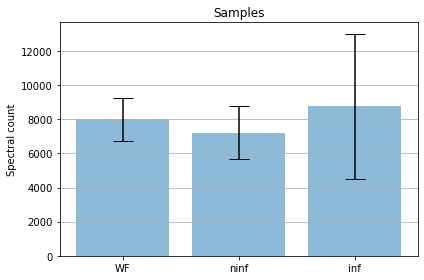

In [8]:
fig, ax = plt.subplots()

samples = ['WF', 'ninf', 'inf']
x_pos = np.arange(len(samples))
CTEs = [mean_WF_samples, mean_ninf_samples, mean_inf_samples]
error = [WF_samples_std, ninf_samples_std, inf_samples_std]

ax.bar(samples, CTEs, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('Spectral count')
ax.set_xticks(x_pos)
ax.set_xticklabels(samples)
ax.set_title('Samples')
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
#plt.savefig('SPC_tot.png')
plt.show()

In [11]:
sum_WF_samples_CO=[sum(WF_samples_CO[0]['#Feature']),sum(WF_samples_CO[1]['#Feature']),sum(WF_samples_CO[2]['#Feature']),sum(WF_samples_CO[3]['#Feature']),sum(WF_samples_CO[4]['#Feature'])]
WF_samples_CO_std=np.std(sum_WF_samples_CO)
sum_inf_samples_CO=[sum(inf_samples_CO[0]['#Feature']),sum(inf_samples_CO[1]['#Feature']),sum(inf_samples_CO[2]['#Feature'])]
inf_samples_CO_std=np.std(sum_inf_samples_CO)
inf_samples_CO_std
sum_ninf_samples_CO=[sum(ninf_samples_CO[0]['#Feature']),sum(ninf_samples_CO[1]['#Feature']),sum(ninf_samples_CO[2]['#Feature'])]
ninf_samples_CO_std=np.std(sum_ninf_samples_CO)
ninf_samples_CO_std
mean_WF_samples_CO = np.mean(sum_WF_samples_CO)
mean_inf_samples_CO = np.mean(sum_inf_samples_CO)
mean_ninf_samples_CO = np.mean(sum_ninf_samples_CO)

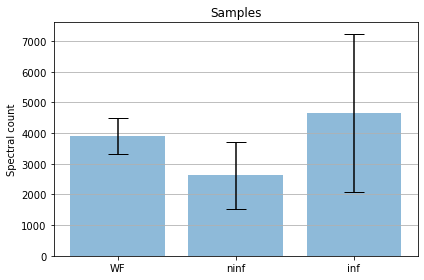

In [12]:
fig, ax = plt.subplots()

samples = ['WF', 'ninf', 'inf']
x_pos = np.arange(len(samples))
CTEs = [mean_WF_samples_CO, mean_ninf_samples_CO, mean_inf_samples_CO]
error = [WF_samples_CO_std, ninf_samples_CO_std, inf_samples_CO_std]

ax.bar(samples, CTEs, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('Spectral count')
ax.set_xticks(x_pos)
ax.set_xticklabels(samples)
ax.set_title('Samples')
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
#plt.savefig('SPC_tot_CO.png')
plt.show()

In [15]:

g=(0.4, 0.7607843137254902, 0.6470588235294118)
r=(0.9882352941176471, 0.5529411764705883, 0.3843137254901961)
l=(0.5529411764705883, 0.6274509803921569, 0.796078431372549)
p=(0.9058823529411765, 0.5411764705882353, 0.7647058823529411)
lg=(0.6509803921568628, 0.8470588235294118, 0.32941176470588235)
y=(1.0, 0.8509803921568627, 0.1843137254901961)

def slicydicy(word):
    if '|' in word:
        word= word.split('|')[2]
        word=word.split(':')[0]
        word=word.split('_')[0]
        return word
    else:
        return word

sheet='inf'
df = pd.read_excel('antimicrobial_map.xlsx', sheet_name=sheet)
df=df.loc[(df['Deep-AmPEP30']>=0.7)]
df=df[['Accession', '#Feature','Feature*Ampep,deep', 'Deep-AmPEP30']]
df['#Feature'].sum()

1695

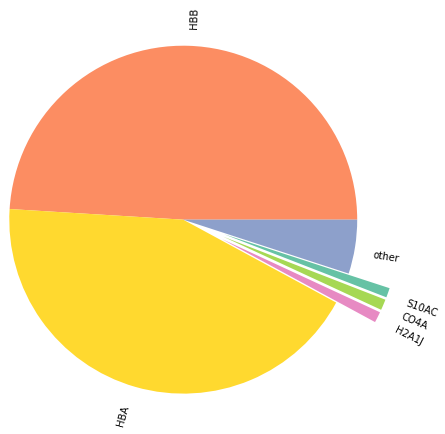

In [110]:
df['Accession']=df['Accession'].apply(lambda x: slicydicy(x))

df=df.groupby('Accession', as_index=False).sum()
df=df.sort_values('Feature*Ampep,deep', ascending=False)


df_imp=df[0:5]
df_misc=df[5:len(df)]
df_imp
df_list_imp=list(df_imp['#Feature'])
other =df_misc['#Feature'].sum()
df_list_imp.append(other)
df_list_imp
labels=df_imp['Accession'][0:5]
labels=list(labels)
labels.append('other')
colors=[r,y,p,lg,g,l]
plt.pie(df_list_imp,labels = labels , rotatelabels=True, explode=[0,0,0.5,0.5,0.5,0], radius=2, colors=colors) 
plt.savefig('inf_AMP_pie.svg', transparent=True, bbox_inches='tight')

In [119]:
sheet='ninf'
df = pd.read_excel('antimicrobial_map.xlsx', sheet_name=sheet)
df=df.loc[(df['Deep-AmPEP30']>=0.7)]
df=df[['Accession', '#Feature','Feature*Ampep,deep', 'Deep-AmPEP30']]
df['#Feature'].sum()

702

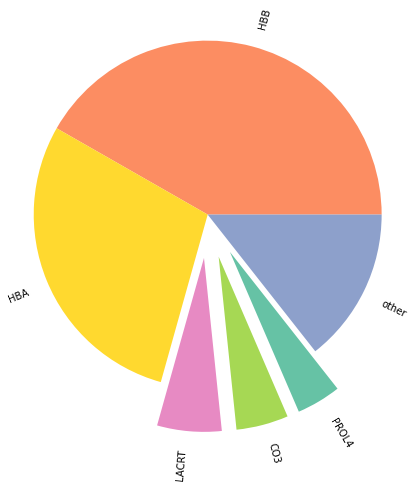

In [112]:
df['Accession']=df['Accession'].apply(lambda x: slicydicy(x))

df=df.groupby('Accession', as_index=False).sum()
df=df.sort_values('Feature*Ampep,deep', ascending=False)


df_imp=df[0:5]
df_misc=df[5:len(df)]
df_imp
df_list_imp=list(df_imp['#Feature'])
other =df_misc['#Feature'].sum()
df_list_imp.append(other)
df_list_imp
labels=df_imp['Accession'][0:5]
labels=list(labels)
labels.append('other')
colors=[r,y,p,lg,g,l]
plt.pie(df_list_imp,labels = labels , rotatelabels=True, explode=[0,0,0.5,0.5,0.5,0], radius=2, colors=colors) 
plt.savefig('ninf_AMP_pie.svg', transparent=True, bbox_inches='tight')

In [120]:
sheet='WF'
df = pd.read_excel('antimicrobial_map.xlsx', sheet_name=sheet)
df=df.loc[(df['Deep-AmPEP30']>=0.7)]
df=df[['Accession', 'Spectral count','Feature*Ampep,deep', 'Deep-AmPEP30']]
df['Spectral count'].sum()

776

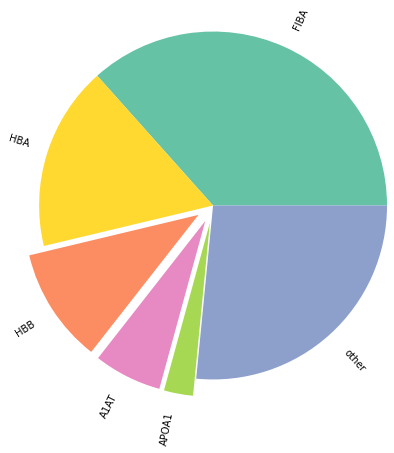

In [116]:
df['Accession']=df['Accession'].apply(lambda x: slicydicy(x))

df=df.groupby('Accession', as_index=False).sum()
df=df.sort_values('Feature*Ampep,deep', ascending=False)


df_imp=df[0:5]
df_misc=df[5:len(df)]
df_imp
df_list_imp=list(df_imp['Spectral count'])
other =df_misc['Spectral count'].sum()
df_list_imp.append(other)
df_list_imp
labels=df_imp['Accession'][0:5]
labels=list(labels)
labels.append('other')
colors=[g,y,r,p,lg,l]
plt.pie(df_list_imp,labels = labels , rotatelabels=True, explode=[0,0,0.2,0.2,0.2,0], radius=2, colors=colors) 
plt.savefig('WF_AMP_pie.svg', transparent=True, bbox_inches='tight')

# Average Antimicrobial score and std

In [65]:
mapp='peptide_sample_inf'
files = os.listdir(mapp)
files_xlsx = [f for f in files if f[-4:] == 'xlsx']
df_inf = pd.DataFrame()
for file in files_xlsx:
    data = pd.read_excel(mapp+ '/' +file, 'peptide')
    data['Peptide']=data['Peptide'].str.replace('[^a-zA-Z]','')
    data['count']=1
    data = data.loc[(data['#Feature'] >= 4)] 
    data = data.groupby(['Peptide'], as_index=False).sum()
    data['Mass']=data['Mass']/data['count']
    data['Length']=data['Length']/data['count']
    data['RT']=data['RT']/data['count']
    df_inf = df_inf.append(data)  # appends all data


df_inf['count']=1
df_inf= df_inf.groupby(['Peptide'], as_index=False).sum()
df_inf = df_inf[['Peptide','#Feature','#Feature Sample 31', '#Feature Sample 34', '#Feature Sample 39','count',]]
df_inf = df_inf.sort_values(['Peptide'])


mapp='WF'
files = os.listdir(mapp)
files_xlsx = [f for f in files if f[-4:] == 'xlsx']
df_WF = pd.DataFrame()
for file in files_xlsx:
    data = pd.read_excel(mapp+ '/' +file, 'peptide')
    data['Peptide']=data['Peptide'].str.replace('[^a-zA-Z]','')
    data['count']=1
    data = data.loc[(data['#Feature'] >= 4)] 
    data = data.groupby(['Peptide'], as_index=False).sum()
    data['Mass']=data['Mass']/data['count']
    data['Length']=data['Length']/data['count']
    data['RT']=data['RT']/data['count']
    df_WF = df_WF.append(data)  # appends all data


df_WF['count']=1
df_WF= df_WF.groupby(['Peptide'], as_index=False).sum()
df_WF = df_WF[['Peptide', '#Feature', '#Feature WF1','#Feature WF2', '#Feature WF 3', '#Feature WF4','#Feature WF5','count']]
df_WF = df_WF.sort_values(['Peptide'])
df_WF

mapp='peptide_sample_ninf'
files = os.listdir(mapp)
files_xlsx = [f for f in files if f[-4:] == 'xlsx']
df_ninf = pd.DataFrame()
for file in files_xlsx:
    data = pd.read_excel(mapp+ '/' +file, 'peptide')
    data['Peptide']=data['Peptide'].str.replace('[^a-zA-Z]','')
    data['count']=1
    data = data.loc[(data['#Feature'] >= 4)] 
    data = data.groupby(['Peptide'], as_index=False).sum()
    data['Mass']=data['Mass']/data['count']
    data['Length']=data['Length']/data['count']
    data['RT']=data['RT']/data['count']
    df_ninf = df_ninf.append(data)  # appends all data


df_ninf['count']=1
df_ninf= df_ninf.groupby(['Peptide'], as_index=False).sum()
df_ninf = df_ninf[['Peptide','#Feature','#Feature Sample 13', '#Feature Sample 21', '#Feature Sample 33','count',]]
df_ninf = df_ninf.sort_values(['Peptide'])



Peptide  #Feature  #Feature WF1  #Feature WF2  \
0      AAFFDTASTGKTFPGFFSPML         5           0.0           0.0   
1       AAGSDVDIDMAFILDSAETT        12           4.0           4.0   
2       AALLSPYSYSTTAVVTNPKE        36           8.0           8.0   
3     AAMSTYTGIFTDQVLSVLKGEE        27           7.0           7.0   
4                  AASQAALGL        16           4.0           4.0   
...                      ...       ...           ...           ...   
1964              YVNKEIQNAV         4           0.0           0.0   
1965           YVNKEIQNAVNGV         4           0.0           0.0   
1966        YVNKEIQNAVNGVKQI        11           0.0           0.0   
1967           YYLQGAKIPKPEA        10           0.0           0.0   
1968      YYLQGAKIPKPEASFSPR         7           0.0           0.0   

      #Feature WF 3  #Feature WF4  #Feature WF5  count  
0               5.0           0.0           0.0      1  
1               4.0           0.0           0.0      3  
2               8.0           7.0           5.0      5  
3               5.0           0.0           8.0      4  
4               4.0           4.0           0.0      4  
...             ...           ...           ...    ...  
1964            4.0           0.0           0.0      1  
1965            4.0           0.0           0.0      1  
1966           11.0           0.0           0.0      1  
1967            6.0           4.0           0.0      2  
1968            7.0           0.0           0.0      1  

[1969 rows x 8 columns]

In [68]:
heatmap_inf=pd.read_excel('heatmap.xlsx',sheet_name='inf')
heatmap_ninf=pd.read_excel('heatmap.xlsx',sheet_name='ninf')
heatmap_WF=pd.read_excel('heatmap.xlsx',sheet_name='WF')

df_inf['AMS1']=df_inf['#Feature Sample 31']*heatmap_inf['Deep-AmPEP30']
df_inf['AMS2']=df_inf['#Feature Sample 34']*heatmap_inf['Deep-AmPEP30']
df_inf['AMS3']=df_inf['#Feature Sample 39']*heatmap_inf['Deep-AmPEP30']

df_ninf['AMS1']=df_ninf['#Feature Sample 13']*heatmap_ninf['Deep-AmPEP30']
df_ninf['AMS2']=df_ninf['#Feature Sample 21']*heatmap_ninf['Deep-AmPEP30']
df_ninf['AMS3']=df_ninf['#Feature Sample 33']*heatmap_ninf['Deep-AmPEP30']

df_WF['AMS1']=df_WF['#Feature WF1']*heatmap_WF['Deep-AmPEP30']
df_WF['AMS2']=df_WF['#Feature WF2']*heatmap_WF['Deep-AmPEP30']
df_WF['AMS3']=df_WF['#Feature WF 3']*heatmap_WF['Deep-AmPEP30']
df_WF['AMS4']=df_WF['#Feature WF4']*heatmap_WF['Deep-AmPEP30']
df_WF['AMS5']=df_WF['#Feature WF5']*heatmap_WF['Deep-AmPEP30']

df_inf

Peptide  #Feature  #Feature Sample 31  #Feature Sample 34  \
0              AAHLPAEF         4                 4.0                 0.0   
1           AAHLPAEFTPA         8                 4.0                 0.0   
2          AAHLPAEFTPAV        12                 4.0                 4.0   
3         AAHLPAEFTPAVH        19                 7.0                 4.0   
4        AAHLPAEFTPAVHA        23                 8.0                 4.0   
...                 ...       ...                 ...                 ...   
1429         YQKVVAGVAN         4                 0.0                 0.0   
1430        YQKVVAGVANA         4                 0.0                 0.0   
1431       YQKVVAGVANAL         8                 4.0                 0.0   
1432      YQKVVAGVANALA         4                 4.0                 0.0   
1433  YQKVVAGVANALAHKYH        41                14.0                 0.0   

      #Feature Sample 39  count        std       AMS1      AMS2       AMS3  
0                    0.0      1   2.309401   0.842340  0.000000   0.000000  
1                    4.0      2   2.309401   0.856340  0.000000   0.856340  
2                    4.0      3   0.000000   1.206076  1.206076   1.206076  
3                    8.0      3   2.081666   2.312100  1.321200   2.642400  
4                   11.0      3   3.511885   3.226968  1.613484   4.437081  
...                  ...    ...        ...        ...       ...        ...  
1429                 4.0      1   2.309401   0.000000  0.000000   2.097264  
1430                 4.0      1   2.309401   0.000000  0.000000   2.364544  
1431                 4.0      2   2.309401   2.203332  0.000000   2.203332  
1432                 0.0      1   2.309401   2.238588  0.000000   0.000000  
1433                27.0      2  13.503086  11.188170  0.000000  21.577185  

[1434 rows x 10 columns]

In [78]:
inf_std=df_inf.copy()
inf_std=inf_std[['AMS1', 'AMS2','AMS3']]
df_inf['std']=inf_std.std(axis=1, numeric_only=True)
df_inf['mean AMS']=inf_std.mean(axis=1, numeric_only=True)
df_inf.sort_values('mean AMS', ascending=False)

Peptide  #Feature  #Feature Sample 31  \
67                          AGVANALAHKYH       109                37.0   
521                          GVANALAHKYH       109                42.0   
126                            ANALAHKYH        94                33.0   
1233                       VAGVANALAHKYH        53                17.0   
827                             NALAHKYH        57                17.0   
...                                  ...       ...                 ...   
1299   VHLTPEEKSAVTALWGKVNVDEVGGEALGRLLV        20                 8.0   
1340   VLSPADKTNVKAAWGKVGAHAGEYGAEALERMF        21                 6.0   
1341  VLSPADKTNVKAAWGKVGAHAGEYGAEALERMFL        22                 9.0   
1219    TYFPHFDLSHGSAQVKGHGKKVADALTNAVAH        30                10.0   
1339    VLSPADKTNVKAAWGKVGAHAGEYGAEALERM        55                25.0   

      #Feature Sample 34  #Feature Sample 39  count        std       AMS1  \
67                  12.0                60.0      3  21.417819  33.009587   
521                 12.0                55.0      3  19.645554  37.415070   
126                  9.0                52.0      3  17.431941  26.695911   
1233                 8.0                28.0      3   8.967839  15.219981   
827                  4.0                36.0      3  12.950308  13.679781   
...                  ...                 ...    ...        ...        ...   
1299                 0.0                12.0      2   6.110101  -8.000000   
1340                 0.0                15.0      2   7.549834  -6.000000   
1341                 0.0                13.0      2   6.658328  -9.000000   
1219                 0.0                20.0      2  10.000000 -10.000000   
1339                 0.0                30.0      2  16.072751 -25.000000   

           AMS2       AMS3   mean AMS  
67    10.705812  53.529060  32.414820  
521   10.690020  48.995925  32.367005  
126    7.280703  42.066284  25.347633  
1233   7.162344  25.068204  15.816843  
827    3.218772  28.968948  15.289167  
...         ...        ...        ...  
1299  -0.000000 -12.000000  -6.666667  
1340  -0.000000 -15.000000  -7.000000  
1341  -0.000000 -13.000000  -7.333333  
1219  -0.000000 -20.000000 -10.000000  
1339  -0.000000 -30.000000 -18.333333  

[1434 rows x 11 columns]

In [79]:
ninf_std=df_ninf.copy()
ninf_std=ninf_std[['AMS1', 'AMS2','AMS3']]
df_ninf['std']=ninf_std.std(axis=1, numeric_only=True)
df_ninf['mean AMS']=ninf_std.mean(axis=1, numeric_only=True)
df_ninf.sort_values('mean AMS', ascending=False)

Peptide  #Feature  #Feature Sample 13  \
339                       GVANALAHKYH        43                13.0   
73                          ANALAHKYH        46                 8.0   
35                       AGVANALAHKYH        41                11.0   
589                         MFLSFPTTK        38                10.0   
1013                   VVAGVANALAHKYH        38                13.0   
...                               ...       ...                 ...   
118              DEAGSEADHEGTHSTKRGHA         4                 4.0   
15                 ADEAGSEADHEGTHSTKR         7                 0.0   
841            SYKMADEAGSEADHEGTHSTKR         4                 4.0   
460         KTETQEKNPLPSKETIEQEKQAGES         4                 0.0   
985   VLSPADKTNVKAAWGKVGAHAGEYGAEALER         5                 0.0   

      #Feature Sample 21  #Feature Sample 33  count       AMS1       AMS2  \
339                 13.0                17.0      3  11.580855  11.580855   
73                  12.0                26.0      3   6.471736   9.707604   
35                  12.0                18.0      3   9.813661  10.705812   
589                 14.0                14.0      3   8.908680  12.472152   
1013                 9.0                16.0      3  11.165687   7.730091   
...                  ...                 ...    ...        ...        ...   
118                  0.0                 0.0      1   0.008436   0.000000   
15                   7.0                 0.0      1   0.000000   0.008134   
841                  0.0                 0.0      1   0.007656   0.000000   
460                  4.0                 0.0      1   0.000000   0.006792   
985                  5.0                 0.0      1  -0.000000  -5.000000   

           AMS3       std   mean AMS  
339   15.144195  2.057295  12.768635  
73    21.033142  7.646058  12.404161  
35    16.058718  3.377629  12.192730  
589   12.472152  2.057372  11.284328  
1013  13.742384  3.016354  10.879387  
...         ...       ...        ...  
118    0.000000  0.004871   0.002812  
15     0.000000  0.004696   0.002711  
841    0.000000  0.004420   0.002552  
460    0.000000  0.003921   0.002264  
985   -0.000000  2.886751  -1.666667  

[1036 rows x 11 columns]

In [99]:
WF_std=df_WF.copy()
WF_std=WF_std[['AMS1', 'AMS2','AMS3','AMS4','AMS5']]
df_WF['std']=WF_std.std(axis=1, numeric_only=True)
df_WF['mean AMS']=WF_std.mean(axis=1, numeric_only=True)
df_WF.sort_values('mean AMS', ascending=False)[0:10]

Peptide  #Feature  #Feature WF1  #Feature WF2  #Feature WF 3  \
130   AVGKVIPELNGKLTGMAF        65          12.0          12.0           16.0   
1527  STGKTFPGFFSPMLGEFV        26           6.0           5.0            4.0   
1404    SLAELGGHLDQQVEEF        47          11.0           9.0            9.0   
1929          YFPHFDLSHG        30           9.0           8.0            6.0   
1417   SLDKFLASVSTVLTSKY        39          12.0           6.0            6.0   
380    FDTASTGKTFPGFFSPM        28           7.0           6.0            5.0   
1258      RLEALKENGGARLA        33          10.0           4.0            4.0   
684           HELQEKLSPL        29           4.0           6.0            6.0   
828       KLDDDLEHQGGHVL        37           5.0           9.0            5.0   
1542    SVLPEGGETPLFKQFF        30           8.0           6.0            6.0   

      #Feature WF4  #Feature WF5  count      AMS1      AMS2      AMS3  \
130           18.0           7.0      5  5.877156  5.877156  7.836208   
1527           6.0           5.0      5  5.078262  4.231885  3.385508   
1404          11.0           7.0      5  5.139057  4.204683  4.204683   
1929           0.0           7.0      4  6.379785  5.670920  4.253190   
1417           0.0          15.0      4  6.515688  3.257844  3.257844   
380            5.0           5.0      5  4.793222  4.108476  3.423730   
1258           4.0          11.0      5  5.754690  2.301876  2.301876   
684            8.0           5.0      5  2.506308  3.759462  3.759462   
828            6.0          12.0      5  2.445910  4.402638  2.445910   
1542           4.0           6.0      5  4.768344  3.576258  3.576258   

          AMS4      AMS5       std  mean AMS  
130   8.815734  3.428341  2.077888  6.366919  
1527  5.078262  4.231885  0.708130  4.401160  
1404  5.139057  3.270309  0.781753  4.391558  
1929  0.000000  4.962055  2.506216  4.253190  
1417  0.000000  8.144610  3.175354  4.235197  
380   3.423730  3.423730  0.612455  3.834578  
1258  2.301876  6.330159  2.058860  3.798095  
684   5.012616  3.132885  0.929364  3.634147  
828   2.935092  5.870184  1.491805  3.619947  
1542  2.384172  3.576258  0.842932  3.576258

In [115]:
#mapp='peptide_sample_inf'
#file='peptide_sample_39.xlsx'
df=pd.read_excel('trombin.xlsx', 'Sheet2')
df['Peptide AL']=df['Peptide AL'].str.replace('[^a-zA-Z]','')
#df=df.groupby('Peptide', as_index=False).sum()
#df['Spectral count']=df['#Feature']
df['Spectral count']=1
df=df.dropna()

df['N-cut']=df['Peptide AL'].apply(lambda x: x[0:4])
df['C-cut']=df['Peptide AL'].apply(lambda x: x[-4::1])
df['First aa']=df['Peptide AL'].apply(lambda x: x[0:1])
df['Last aa']=df['Peptide AL'].apply(lambda x: x[-1::1])

def get_letter_frequency(list):
    letters={
        'A':0,
        'G':0,
        'V':0,
        'L':0,
        'I':0,
        'P':0,
        'F':0,
        'W':0,
        'M':0,
        'S':0,
        'T':0,
        'C':0,
        'Y':0,
        'N':0,
        'Q':0,
        'K':0,
        'R':0,
        'H':0,
        'D':0,
        'E':0
    }
    for word in list:
        for letter in word:
            if letter != ' ':
                letters[letter] +=1
    return letters
df

Peptide AL  Spectral count N-cut C-cut First aa Last aa
0       FYTHVFRLKKWIQKVIDQFGE               1  FYTH  QFGE        F       E
1                  IQKVIDQFGE               1  IQKV  QFGE        I       E
2                 WIQKVIDQFGE               1  WIQK  QFGE        W       E
3        YTHVFRLKKWIQKVIDQFGE               1  YTHV  QFGE        Y       E
4          AASLLQAGYKGRVTGWGN               1  AASL  GWGN        A       N
5           ANVGKGQPSVLQVVNLP               1  ANVG  VNLP        A       P
6             DKTERELLESYIDGR               1  DKTE  IDGR        D       R
7            EDKTERELLESYIDGR               1  EDKT  IDGR        E       R
8      FEKKSLEDKTERELLESYIDGR               1  FEKK  IDGR        F       R
9                   FTENDLLVR               1  FTEN  LLVR        F       R
10                 FTENDLLVRI               1  FTEN  LVRI        F       I
11   HSRTRYERNIEKISMLEKIYIHPR               1  HSRT  IHPR        H       R
12             ISMLEKIYIHPRYN               1  ISML  PRYN        I       N
13            IVEGSDAEIGMSPWQ               1  IVEG  SPWQ        I       Q
14          IVEGSDAEIGMSPWQVM               1  IVEG  WQVM        I       M
15       IVEGSDAEIGMSPWQVMLFR               1  IVEG  MLFR        I       R
16      IVEGSDAEIGMSPWQVMLFRK               1  IVEG  LFRK        I       K
17    IVEGSDAEIGMSPWQVMLFRKSP               1  IVEG  RKSP        I       P
18    IVEGSDAEIGMSPWQVMLFRKSP               1  IVEG  RKSP        I       P
19        KSLEDKTERELLESYIDGR               1  KSLE  IDGR        K       R
20          LEDKTERELLESYIDGR               1  LEDK  IDGR        L       R
21         LFEKKSLEDKTERELLES               1  LFEK  LLES        L       S
22                  LISDRWVLT               1  LISD  WVLT        L       T
23                  LLESYIDGR               1  LLES  IDGR        L       R
24             LLQAGYKGRVTGWG               1  LLQA  TGWG        L       G
25            LLQAGYKGRVTGWGN               1  LLQA  GWGN        L       N
26        LLQAGYKGRVTGWGNLKET               1  LLQA  LKET        L       T
27         LLYPPWDKNFTENDLLVR               1  LLYP  LLVR        L       R
28    LRPLFEKKSLEDKTERELLESYI               1  LRPL  ESYI        L       I
29     MLEKIYIHPRYNWRENLDRDIA               1  MLEK  RDIA        M       A
30           NIEKISMLEKIYIHPR               1  NIEK  IHPR        N       R
31         NIEKISMLEKIYIHPRYN               1  NIEK  PRYN        N       N
32           NVGKGQPSVLQVVNLP               1  NVGK  VNLP        N       P
33  RPLFEKKSLEDKTERELLESYIDGR               1  RPLF  IDGR        R       R
34         SLEDKTERELLESYIDGR               1  SLED  IDGR        S       R
35      TRYERNIEKISMLEKIYIHPR               1  TRYE  IHPR        T       R
36    TRYERNIEKISMLEKIYIHPRYN               1  TRYE  PRYN        T       N
37         LLYPPWDKNFTENDLLVR               1  LLYP  LLVR        L       R
38            VGKGQPSVLQVVNLP               1  VGKG  VNLP        V       P
39                WRENLDRDIAL               1  WREN  DIAL        W       L
40          LQAGYKGRVTGWGNLKE               1  LQAG  NLKE        L       E
41     TAASLLQAGYKGRVTGWGNLKE               1  TAAS  NLKE        T       E
42            TWTANVGKGQPSVLQ               1  TWTA  SVLQ        T       Q
43            YNWRENLDRDIALMK               1  YNWR  ALMK        Y       K
44              WRENLDRDIALMK               1  WREN  ALMK        W       K
45          WRENLDRDIALMKLKKP               1  WREN  LKKP        W       P
46        WRENLDRDIALMKLKKPVA               1  WREN  KPVA        W       A
47        YERNIEKISMLEKIYIHPR               1  YERN  IHPR        Y       R
48      YERNIEKISMLEKIYIHPRYN               1  YERN  PRYN        Y       N
49        YNWRENLDRDIALMKLKKP               1  YNWR  LKKP        Y       P
50      YNWRENLDRDIALMKLKKPVA               1  YNWR  KPVA        Y       A
51     GSDAEIGMSPWQVMLFRKSPQE               1  GSDA  SPQE        G       E
52          IGMSPWQVMLFRKSPQE               

In [124]:
aminoacids = get_letter_frequency(df['Peptide AL']*df['Spectral count'])
N_aminoacids=get_letter_frequency(df['N-cut']*df['Spectral count'])
C_aminoacids=get_letter_frequency(df['C-cut']*df['Spectral count'])
First_aa=get_letter_frequency(df['First aa']*df['Spectral count'])
Last_aa=get_letter_frequency(df['Last aa']*df['Spectral count'])
print(aminoacids)
print(First_aa)
print(Last_aa)

{'A': 29, 'G': 60, 'V': 46, 'L': 105, 'I': 75, 'P': 38, 'F': 21, 'W': 29, 'M': 30, 'S': 53, 'T': 30, 'C': 0, 'Y': 42, 'N': 40, 'Q': 32, 'K': 79, 'R': 74, 'H': 12, 'D': 53, 'E': 99}
{'A': 2, 'G': 1, 'V': 1, 'L': 11, 'I': 9, 'P': 0, 'F': 4, 'W': 5, 'M': 1, 'S': 1, 'T': 4, 'C': 0, 'Y': 6, 'N': 3, 'Q': 0, 'K': 2, 'R': 1, 'H': 1, 'D': 1, 'E': 1}
{'A': 3, 'G': 1, 'V': 0, 'L': 1, 'I': 2, 'P': 7, 'F': 0, 'W': 0, 'M': 1, 'S': 1, 'T': 2, 'C': 0, 'Y': 0, 'N': 6, 'Q': 2, 'K': 3, 'R': 17, 'H': 0, 'D': 0, 'E': 8}


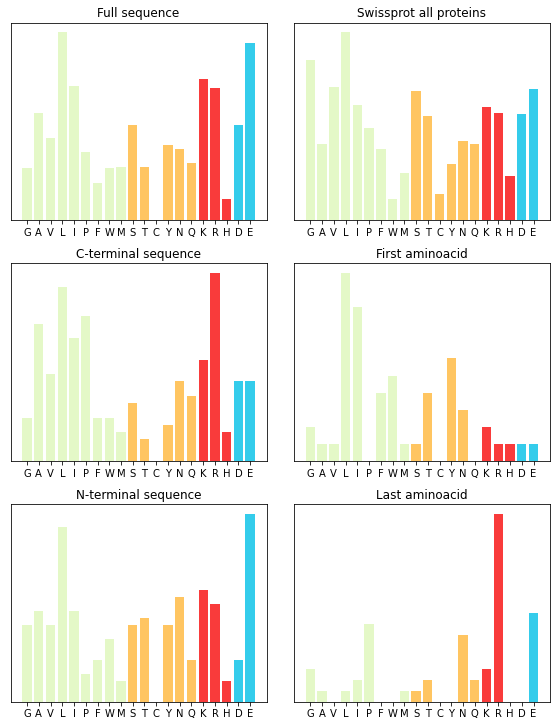

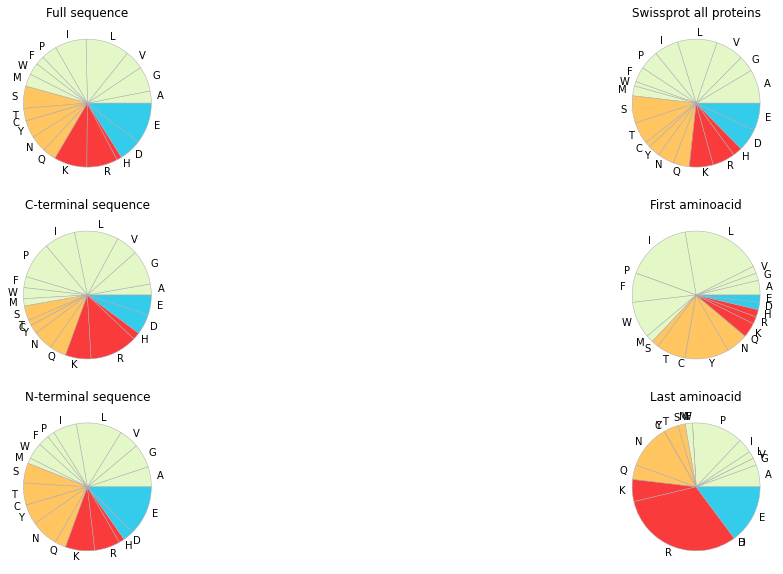

In [119]:

color=['#e4f8c7', '#e4f8c7','#e4f8c7','#e4f8c7','#e4f8c7','#e4f8c7','#e4f8c7','#e4f8c7','#e4f8c7','#ffc561','#ffc561','#ffc561','#ffc561','#ffc561','#ffc561','#f93b3b','#f93b3b','#f93b3b','#34cceb','#34cceb','#34cceb']


fig, ax1 = plt.subplots(3,2,figsize=(8,10))
ax1[0,0].bar(range(len(aminoacids)), list(aminoacids.values()), align='center', color=color)
ax1[2,0].bar(range(len(N_aminoacids)), list(N_aminoacids.values()), align='center', color=color)
ax1[1,0].bar(range(len(C_aminoacids)), list(C_aminoacids.values()), align='center', color=color)
ax1[1,1].bar(range(len(First_aa)), list(First_aa.values()), align='center', color=color)
ax1[2,1].bar(range(len(Last_aa)), list(Last_aa.values()), align='center', color=color)
ax1[0,1].bar(range(len(Normal_aminoacids)), list(Normal_aminoacids.values()), align='center', color=color)

ax1[0,0].set_title('Full sequence')
ax1[0,1].set_title('Swissprot all proteins')
ax1[2,0].set_title('N-terminal sequence')
ax1[1,0].set_title('C-terminal sequence')
ax1[1,1].set_title('First aminoacid')
ax1[2,1].set_title('Last aminoacid')

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.setp(ax1, xticks=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], xticklabels=['G','A','V','L','I','P','F','W','M','S','T','C','Y','N','Q','K','R','H','D','E'], yticks=([]))

fig, ax = plt.subplots(3,2,figsize=(20,10))
wp = { 'linewidth' : 0.5, 'edgecolor' : "#afabb3" } 

ax[0,0].pie(aminoacids.values(),labels = aminoacids.keys(), colors=color, wedgeprops=wp) 
ax[2,0].pie(N_aminoacids.values(),labels =N_aminoacids.keys(), colors=color, wedgeprops=wp) 
ax[1,0].pie(C_aminoacids.values(),labels = C_aminoacids.keys(), colors=color, wedgeprops=wp) 
ax[1,1].pie(First_aa.values(),labels = First_aa.keys(), colors=color, wedgeprops=wp) 
ax[2,1].pie(Last_aa.values(),labels = Last_aa.keys(), colors=color, wedgeprops=wp) 
ax[0,1].pie(Normal_aminoacids.values(),labels = Normal_aminoacids.keys(), colors=color, wedgeprops=wp) 

ax[0,0].set_title('Full sequence')
ax[0,1].set_title('Swissprot all proteins')
ax[2,0].set_title('N-terminal sequence')
ax[1,0].set_title('C-terminal sequence')
ax[1,1].set_title('First aminoacid')
ax[2,1].set_title('Last aminoacid')


fig.savefig('SA_pie.svg', transparent=True, bbox='tight')

Text(0.5, 1.0, 'Last aminoacid')

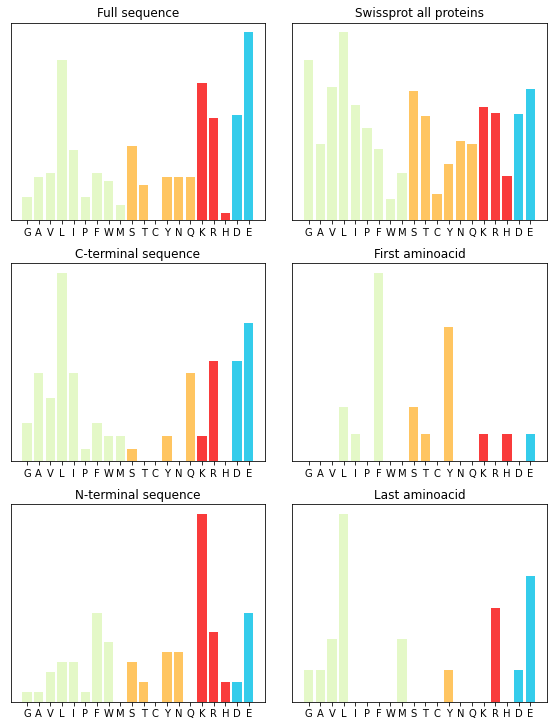

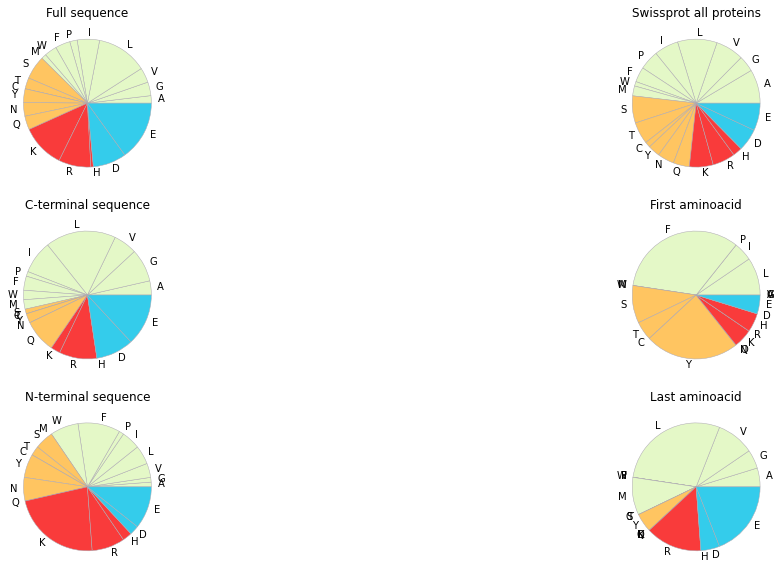

In [113]:

color=['#e4f8c7', '#e4f8c7','#e4f8c7','#e4f8c7','#e4f8c7','#e4f8c7','#e4f8c7','#e4f8c7','#e4f8c7','#ffc561','#ffc561','#ffc561','#ffc561','#ffc561','#ffc561','#f93b3b','#f93b3b','#f93b3b','#34cceb','#34cceb','#34cceb']


fig, ax1 = plt.subplots(3,2,figsize=(8,10))
ax1[0,0].bar(range(len(aminoacids)), list(aminoacids.values()), align='center', color=color)
ax1[2,0].bar(range(len(N_aminoacids)), list(N_aminoacids.values()), align='center', color=color)
ax1[1,0].bar(range(len(C_aminoacids)), list(C_aminoacids.values()), align='center', color=color)
ax1[1,1].bar(range(len(First_aa)), list(First_aa.values()), align='center', color=color)
ax1[2,1].bar(range(len(Last_aa)), list(Last_aa.values()), align='center', color=color)
ax1[0,1].bar(range(len(Normal_aminoacids)), list(Normal_aminoacids.values()), align='center', color=color)

ax1[0,0].set_title('Full sequence')
ax1[0,1].set_title('Swissprot all proteins')
ax1[2,0].set_title('N-terminal sequence')
ax1[1,0].set_title('C-terminal sequence')
ax1[1,1].set_title('First aminoacid')
ax1[2,1].set_title('Last aminoacid')

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.setp(ax1, xticks=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], xticklabels=['G','A','V','L','I','P','F','W','M','S','T','C','Y','N','Q','K','R','H','D','E'], yticks=([]))

fig, ax = plt.subplots(3,2,figsize=(20,10))
wp = { 'linewidth' : 0.5, 'edgecolor' : "#afabb3" } 

ax[0,0].pie(aminoacids.values(),labels = aminoacids.keys(), colors=color, wedgeprops=wp) 
ax[2,0].pie(N_aminoacids.values(),labels =N_aminoacids.keys(), colors=color, wedgeprops=wp) 
ax[1,0].pie(C_aminoacids.values(),labels = C_aminoacids.keys(), colors=color, wedgeprops=wp) 
ax[1,1].pie(First_aa.values(),labels = First_aa.keys(), colors=color, wedgeprops=wp) 
ax[2,1].pie(Last_aa.values(),labels = Last_aa.keys(), colors=color, wedgeprops=wp) 
ax[0,1].pie(Normal_aminoacids.values(),labels = Normal_aminoacids.keys(), colors=color, wedgeprops=wp) 

ax[0,0].set_title('Full sequence')
ax[0,1].set_title('Swissprot all proteins')
ax[2,0].set_title('N-terminal sequence')
ax[1,0].set_title('C-terminal sequence')
ax[1,1].set_title('First aminoacid')
ax[2,1].set_title('Last aminoacid')

In [340]:
df=pd.read_excel('proteasix_data.xlsx')
df=df[['Protease Human/Mouse/Rat','Spectral_inf','Protease Human/Mouse/Rat.1','Spectral_ninf']]
df['Protease Human/Mouse/Rat']=df['Protease Human/Mouse/Rat'].apply(lambda x: str(x).split('(')[0])
df['Protease Human/Mouse/Rat.1']=df['Protease Human/Mouse/Rat.1'].apply(lambda x: str(x).split('(')[0])

df_inf=df[['Protease Human/Mouse/Rat','Spectral_inf']]
df_ninf=df[['Protease Human/Mouse/Rat.1','Spectral_ninf']]

df_inf=df_inf.loc[(df_inf['Protease Human/Mouse/Rat'] != 'PGA3 ')]
df_ninf=df_ninf.loc[(df_ninf['Protease Human/Mouse/Rat.1'] != 'PGA3 ')]
df_ninf.dropna()

Protease Human/Mouse/Rat.1  Spectral_ninf
0                      Capn2            1462
1                      Capn1            1337
2                       MMP7            1282
4                       Ctss             902
5                      Mep1a             864
6                       Ctsb             825
7                      MMP14             784
8                       MMP9             749
9                       Ctsl             748
10                       PLG             609
11                      Try3             566
12                     ELANE             515
13                      Ctsk             504
14                      Mmp3             482
15                      MMP2             457
16                     Mmp12             396
17                      KLK6             360
18                       Mme             359
19                     Mmp25             345
20                   TMPRSS7             325
21                      CTSG             289
22                   TMPRSS6             285
23                      CTSD             283
24                      Mmp8             257
25                      Gzma             249
26                      KLK4             232
27                   ADAMTS4             226
28                      CTSE             211
29                      KLK2             206
30                     Casp1             202
31                      KLK3             171
32                       Hpn             166
33                        F2             156
34                     Mcpt3             120
35                     Mmp13             120
36                      GZMM             114
37                     HTRA2              93
38                 Tmprss11e              81
39                      St14              81
40                      GZMB              64
41                      Gzmb              64
42                       Pgc              46
43                      MMP1              38
44                     KLKB1              35
45                     Pcsk5              31
46                     PCSK2              30
47                 TMPRSS11D              26
48                     CASP7              20
49                      KLK5              18
50                     Klk14              14
51                      Cma1              14
52                    ADAM17              12

In [322]:
inf_protease=df_inf['Protease Human/Mouse/Rat'][0:10]
inf_protease=list(inf_protease)
inf_other=df_inf['Protease Human/Mouse/Rat'][10:len(df['Protease Human/Mouse/Rat'])]

ninf_protease=df_ninf['Protease Human/Mouse/Rat.1'][0:10]
ninf_protease=list(ninf_protease)
ninf_other=df_ninf['Protease Human/Mouse/Rat.1'][10:len(df['Protease Human/Mouse/Rat.1'])]

inf_feat=list(df_inf['Spectral_inf'][0:10])
ninf_feat=list(df_ninf['Spectral_ninf'][0:10])
ninf_rest=df_ninf['Spectral_ninf'][10:len(df_ninf['Spectral_ninf'])].sum()
inf_rest=df_inf['Spectral_inf'][10:len(df_inf['Spectral_inf'])].sum()
inf_feat

[1908.0,
 1748.0,
 1667.0,
 1627.0,
 1609.0,
 1425.0,
 1390.0,
 1264.0,
 1200.0,
 1100.0]

<BarContainer object of 10 artists>

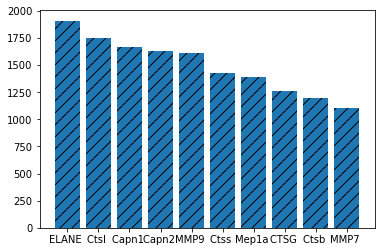

In [338]:

colors=[r,y,p,lg,g,l]
plt.bar(range(len(inf_protease)), inf_feat, align='center', tick_label=inf_protease, ecolor=None, hatch='//') 


<BarContainer object of 10 artists>

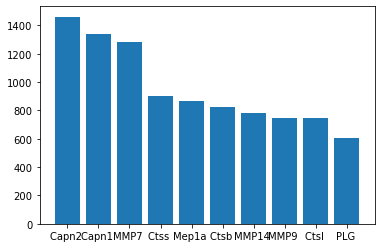

In [339]:

colors=[r,y,p,lg,g,l]
plt.bar(range(len(ninf_protease)), ninf_feat, align='center',  tick_label=ninf_protease, ecolor=None) 


# HBB quantification

In [416]:
mapp='protein-peptide_sample_inf'
files = os.listdir(mapp)
# gets all xlsx files in cwd
files_xlsx = [f for f in files if f[-4:] == 'xlsx']
df = pd.DataFrame() # the dataframe to be analyzed 

number_of_files=0
for file in files_xlsx:
    data = pd.read_excel(mapp+ '/' +file)
    data = data.loc[(data['#Feature'] >= 4)]
    df=df.append(data)
    
df


Protein Group  Protein ID      Protein Accession  \
0                 1      137976    sp|P69905|HBA_HUMAN   
1                 1      137976    sp|P69905|HBA_HUMAN   
2                 1      137976    sp|P69905|HBA_HUMAN   
3                 1      137976    sp|P69905|HBA_HUMAN   
4                 1      137976    sp|P69905|HBA_HUMAN   
...             ...         ...                    ...   
5652            148      138205  sp|Q8IZP2|ST134_HUMAN   
5661             97      138302   sp|Q8IWB9|TEX2_HUMAN   
5676            130      138176   sp|P52209|6PGD_HUMAN   
5709            146      138310   sp|P02747|C1QC_HUMAN   
5724            147      138216  sp|Q5CZC0|FSIP2_HUMAN   

                                     Peptide Unique  -10lgP       Mass  \
0            K.TNVKAAWGKVGAHAGEYGAEALERMFL.S      Y   92.76  2875.4438   
1               K.TNVKAAWGKVGAHAGEYGAEALER.M      Y   91.89  2484.2510   
2                K.AAWGKVGAHAGEYGAEALERMFL.S      Y   91.79  2433.1899   
3                V.DDMPNALSALSDLHAHKLRVDPV.N      Y   91.73  2513.2695   
4     M.VLSPADKTNVKAAWGKVGAHAGEYGAEALERMFL.S      Y   90.15  3585.8401   
...                                      ...    ...     ...        ...   
5652                        F.TDAIKLNPRLAI.L      Y   46.75  1323.7874   
5661                            T.PPSAHKYH.K      Y   41.03   935.4613   
5676                          Y.ELLAKPGQFI.H      Y   30.82  1114.6385   
5709                      V.TRQTHQPPAPNSLI.R      Y   35.75  1558.8215   
5724                            F.SDAQIKVF.R      Y   29.16   906.4811   

      Length  ppm        m/z  ...  #Feature  #Feature Sample 31  Start   End  \
0         27  1.9   959.4904  ...         4                 4.0      9    35   
1         24  0.6   622.0704  ...        15                15.0      9    32   
2         23  3.6  1217.6066  ...         4                 4.0     13    35   
3         23  2.1   629.3260  ...         4                 4.0     75    97   
4         34  2.6   897.4697  ...         9                 9.0      2    35   
...      ...  ...        ...  ...       ...                 ...    ...   ...   
5652      12  4.8   442.2719  ...         4                 NaN    134   145   
5661       8 -0.7   468.7376  ...         9                 NaN    518   525   
5676      10  0.4   558.3268  ...         4                 NaN    456   465   
5709      14  1.7   520.6154  ...         4                 NaN    125   138   
5724       8  1.9   454.2487  ...         4                 NaN   5840  5847   

      PTM AScore  Area Sample 34  #Feature Sample 34  Area Sample 39  \
0     NaN    NaN             NaN                 NaN             NaN   
1     NaN    NaN             NaN                 NaN             NaN   
2     NaN    NaN             NaN                 NaN             NaN   
3     NaN    NaN             NaN                 NaN             NaN   
4     NaN    NaN             NaN                 NaN             NaN   
...   ...    ...             ...                 ...             ...   
5652  NaN    NaN             NaN                 NaN       3140000.0   
5661  NaN    NaN             NaN                 NaN      10500000.0   
5676  NaN    NaN             NaN                 NaN       3230000.0   
5709  NaN    NaN             NaN                 NaN      13500000.0   
5724  NaN    NaN             NaN                 NaN       3210000.0   

      #Feature Sample 39  
0                    NaN  
1                    NaN  
2                    NaN  
3                    NaN  
4                    NaN  
...                  ...  
5652                 4.0  
5661                 9.0  
5676                 4.0  
5709                 4.0  
5724                 4.0  

[2869 rows x 26 columns]

In [418]:
Protein='sp|P68871|HBB_HUMAN'
Start=110
End=150
df_start=df.loc[(df['Start']>=Start)]
df_end=df_start.loc[(df_start['End']<=End)]
df_end=df_end.loc[(df_end['Protein Accession']==Protein)]

In [420]:

sample_31=df_end['#Feature Sample 31'].sum()
sample_39=df_end['#Feature Sample 39'].sum()
sample_34=df_end['#Feature Sample 34'].sum()
samples=[sample_31,sample_39,sample_34]
mean=np.mean(samples)
std=np.std(samples, ddof=1)
total=np.sum(samples)
total

859.0

In [421]:
mapp='protein-peptide_sample_ninf'
files = os.listdir(mapp)
# gets all xlsx files in cwd
files_xlsx = [f for f in files if f[-4:] == 'xlsx']
df = pd.DataFrame() # the dataframe to be analyzed 

number_of_files=0
for file in files_xlsx:
    data = pd.read_excel(mapp+ '/' +file)
    data = data.loc[(data['#Feature'] >= 4)]
    df=df.append(data)
    
df


Protein Group  Protein ID      Protein Accession  \
0                 1      137976    sp|P69905|HBA_HUMAN   
1                 1      137976    sp|P69905|HBA_HUMAN   
2                 1      137976    sp|P69905|HBA_HUMAN   
3                 3      137975    sp|P68871|HBB_HUMAN   
4                 3      137975    sp|P68871|HBB_HUMAN   
...             ...         ...                    ...   
4428            113      152945   sp|Q96A32|MLRS_HUMAN   
4466            123      138203   sp|P02766|TTHY_HUMAN   
4477            121      138385  sp|P08758|ANXA5_HUMAN   
4554            162      152972  sp|Q8NBJ4|GOLM1_HUMAN   
4654            155      138176   sp|P52209|6PGD_HUMAN   

                              Peptide Unique  -10lgP       Mass  Length  ppm  \
0                 K.VGAHAGEYGAEALER.M      Y   56.80  1528.7269      15  7.8   
1     V.AHVDDM(+15.99)PNALSALSDLHAH.K      Y   63.95  2028.9323      19  0.4   
2        V.DDM(+15.99)PNALSALSDLHAH.K      Y   61.60  1721.7678      16  3.9   
3                       A.GVANALAHKYH      N   53.69  1179.6149      11  0.1   
4                    K.VVAGVANALAHKYH      N   53.60  1448.7888      14  0.1   
...                               ...    ...     ...        ...     ...  ...   
4428                   R.DGIIDKEDLR.D      Y   36.79  1172.6036      10 -0.3   
4466                      T.TAVVTNPKE      Y   32.52   957.5131       9  2.6   
4477          K.NFATSLYSM(+15.99)IK.G      Y   41.65  1289.6326      11  0.3   
4554                  R.NIDVFNVEDQK.R      Y   43.74  1319.6357      11 -1.1   
4654                   Y.ELLAKPGQFI.H      Y   30.69  1114.6385      10  3.0   

           m/z  ...  #Feature  #Feature Sample 13  Start  End            PTM  \
0     765.3767  ...        16                16.0     18   32            NaN   
1     508.2405  ...        15                15.0     72   90  Oxidation (M)   
2     574.9321  ...        13                13.0     75   90  Oxidation (M)   
3     590.8148  ...        13                13.0    137  147            NaN   
4     483.9370  ...        13                13.0    134  147            NaN   
...        ...  ...       ...                 ...    ...  ...            ...   
4428  391.8750  ...         4                 NaN     42   51            NaN   
4466  479.7650  ...         4                 NaN    139  147            NaN   
4477  645.8237  ...         4                 NaN    291  301  Oxidation (M)   
4554  660.8244  ...         4                 NaN    374  384            NaN   
4654  558.3282  ...         4                 NaN    456  465            NaN   

                        AScore  Area Sample 21  #Feature Sample 21  \
0                          NaN             NaN                 NaN   
1     M6:Oxidation (M):1000.00             NaN                 NaN   
2     M3:Oxidation (M):1000.00             NaN                 NaN   
3                          NaN             NaN                 NaN   
4                          NaN             NaN                 NaN   
...                        ...             ...                 ...   
4428                       NaN             NaN                 NaN   
4466                       NaN             NaN                 NaN   
4477  M9:Oxidation (M):1000.00             NaN                 NaN   
4554                       NaN             NaN                 NaN   
4654                       NaN             NaN                 NaN   

      Area Sample 33  #Feature Sample 33  
0                NaN                 NaN  
1                NaN                 NaN  
2                NaN                 NaN  
3                NaN                 NaN  
4                NaN                 NaN  
...              ...                 ...  
4428       1780000.0                 4.0  
4466       5690000.0                 4.0  
4477        318000.0                 4.0  
4554        796000.0                 4.0  
4654       1700000.0                 4.0  

[1820 rows x 26 columns]

In [422]:
Protein='sp|P68871|HBB_HUMAN'
Start=110
End=150
df_start=df.loc[(df['Start']>=Start)]
df_end=df_start.loc[(df_start['End']<=End)]
df_end=df_end.loc[(df_end['Protein Accession']==Protein)]

In [423]:

sample_13=df_end['#Feature Sample 13'].sum()
sample_21=df_end['#Feature Sample 21'].sum()
sample_33=df_end['#Feature Sample 33'].sum()
samples=[sample_13,sample_21,sample_33]
mean=np.mean(samples)
std=np.std(samples, ddof=1)
total=np.sum(samples)
total

293.0

In [424]:
mapp='protein-peptide_sample_WF'
files = os.listdir(mapp)
# gets all xlsx files in cwd
files_xlsx = [f for f in files if f[-4:] == 'xlsx']
df = pd.DataFrame() # the dataframe to be analyzed 

number_of_files=0
for file in files_xlsx:
    data = pd.read_excel(mapp+ '/' +file)
    data = data.loc[(data['#Feature'] >= 4)]
    df=df.append(data)
    
df


Protein Group  Protein ID      Protein Accession  \
0                 1      308259    sp|P69905|HBA_HUMAN   
1                 1      308259    sp|P69905|HBA_HUMAN   
2                 1      308259    sp|P69905|HBA_HUMAN   
3                 1      308259    sp|P69905|HBA_HUMAN   
4                 1      308259    sp|P69905|HBA_HUMAN   
...             ...         ...                    ...   
3409            182      313377  sp|Q06323|PSME1_HUMAN   
3414            142      318973    sp|P14174|MIF_HUMAN   
3422            162      308686  sp|Q9HBR0|S38AA_HUMAN   
3471            128      308656   sp|P02787|TRFE_HUMAN   
3504            160      308428   sp|P02750|A2GL_HUMAN   

                          Peptide Unique  -10lgP       Mass  Length  ppm  \
0             K.TYFPHFDLSHGSAQV.K      Y   90.76  1704.7896      15  1.6   
1              T.YFPHFDLSHGSAQV.K      Y   89.77  1603.7419      14  0.7   
2         V.HASLDKFLASVSTVLTSKY.R      Y   88.58  2066.1047      19  0.2   
3           A.SLDKFLASVSTVLTSKY.R      Y   84.86  1858.0088      17  1.1   
4     V.GAHAGEYGAEALERM(+15.99).F      Y   80.13  1576.6940      15  1.1   
...                           ...    ...     ...        ...     ...  ...   
3409              K.TENLLGSYFPK.K      Y   57.46  1267.6448      11  2.1   
3414      M.PM(+15.99)FIVNTNVPR.A      Y   55.48  1302.6754      11  0.4   
3422                N.LPPLPLDPV.L      Y   44.46   959.5691       9  0.3   
3471     V.TLDAGLVYDAYLAPNNLKPV.V      Y   38.20  2146.1309      20  1.1   
3504               V.KGQTLLAVAKSQ      Y   35.92  1242.7295      12  0.3   

            m/z  ...            PTM                     AScore  Area WF2  \
0      853.4034  ...            NaN                        NaN       NaN   
1      802.8788  ...            NaN                        NaN       NaN   
2     1034.0598  ...            NaN                        NaN       NaN   
3      930.0127  ...            NaN                        NaN       NaN   
4      789.3552  ...  Oxidation (M)  M15:Oxidation (M):1000.00       NaN   
...         ...  ...            ...                        ...       ...   
3409   634.8310  ...            NaN                        NaN       NaN   
3414   652.3453  ...  Oxidation (M)   M2:Oxidation (M):1000.00       NaN   
3422   480.7920  ...            NaN                        NaN       NaN   
3471  1074.0739  ...            NaN                        NaN       NaN   
3504   415.2505  ...            NaN                        NaN       NaN   

      #Feature WF2 Area WF 3 #Feature WF 3  Area WF4  #Feature WF4  \
0              NaN       NaN           NaN       NaN           NaN   
1              NaN       NaN           NaN       NaN           NaN   
2              NaN       NaN           NaN       NaN           NaN   
3              NaN       NaN           NaN       NaN           NaN   
4              NaN       NaN           NaN       NaN           NaN   
...            ...       ...           ...       ...           ...   
3409           NaN       NaN           NaN       NaN           NaN   
3414           NaN       NaN           NaN       NaN           NaN   
3422           NaN       NaN           NaN       NaN           NaN   
3471           NaN       NaN           NaN       NaN           NaN   
3504           NaN       NaN           NaN       NaN           NaN   

        Area WF5  #Feature WF5  
0            NaN           NaN  
1            NaN           NaN  
2            NaN           NaN  
3            NaN           NaN  
4            NaN           NaN  
...          ...           ...  
3409   2780000.0           4.0  
3414  24000000.0           5.0  
3422    511000.0           4.0  
3471    972000.0           4.0  
3504    817000.0           4.0  

[4278 rows x 30 columns]

In [425]:
Protein='sp|P68871|HBB_HUMAN'
Start=110
End=150
df_start=df.loc[(df['Start']>=Start)]
df_end=df_start.loc[(df_start['End']<=End)]
df_end=df_end.loc[(df_end['Protein Accession']==Protein)]

In [427]:

sample_WF1=df_end['#Feature WF1'].sum()
sample_WF2=df_end['#Feature WF2'].sum()
sample_WF3=df_end['#Feature WF 3'].sum()
sample_WF4=df_end['#Feature WF4'].sum()
sample_WF5=df_end['#Feature WF5'].sum()
samples=[sample_WF1, sample_WF2, sample_WF3, sample_WF4, sample_WF5]
mean=np.mean(samples)
std=np.std(samples, ddof=1)
total=np.sum(samples)
total

75.0

# Create new piecharts

In [559]:
mapp='protein-peptide_sample_inf'
files = os.listdir(mapp)
# gets all xlsx files in cwd
files_xlsx = [f for f in files if f[-4:] == 'xlsx']
df_first = pd.DataFrame() # the dataframe to be analyzed 
df_last = pd.DataFrame()
df=pd.DataFrame()
number_of_files=0
for file in files_xlsx:
    data = pd.read_excel(mapp+ '/' +file)
    data = data.loc[(data['#Feature'] >= 4)]
    data['Peptide']= data['Peptide'].str.replace('\d+', '')
    data['Peptide']= data['Peptide'].str.replace(r'\(\+\.\)', '')
    data['Peptide'].drop_duplicates(inplace=True)
    p_prime=[]
    p=[]
    data['Peptide'].fillna(value='Not available',inplace=True)
    for item in data['Peptide']:
        if item[-2] == '.':
            p_prime.append(item)
        if item[1]=='.':
            p.append(item)
    df=df.append(data)
    
    
df_p=pd.DataFrame(p)
df_p_prime=pd.DataFrame(p_prime)

{'A': 2108, 'G': 1460, 'V': 2310, 'L': 1009, 'I': 34, 'P': 270, 'F': 664, 'W': 146, 'M': 326, 'S': 1550, 'T': 1078, 'C': 0, 'Y': 472, 'N': 389, 'Q': 140, 'K': 387, 'R': 84, 'H': 1056, 'D': 1008, 'E': 451}
{'A': 1136, 'G': 252, 'V': 2345, 'L': 1692, 'I': 249, 'P': 4, 'F': 1251, 'W': 0, 'M': 571, 'S': 224, 'T': 516, 'C': 0, 'Y': 219, 'N': 216, 'Q': 54, 'K': 2508, 'R': 1068, 'H': 494, 'D': 158, 'E': 79}


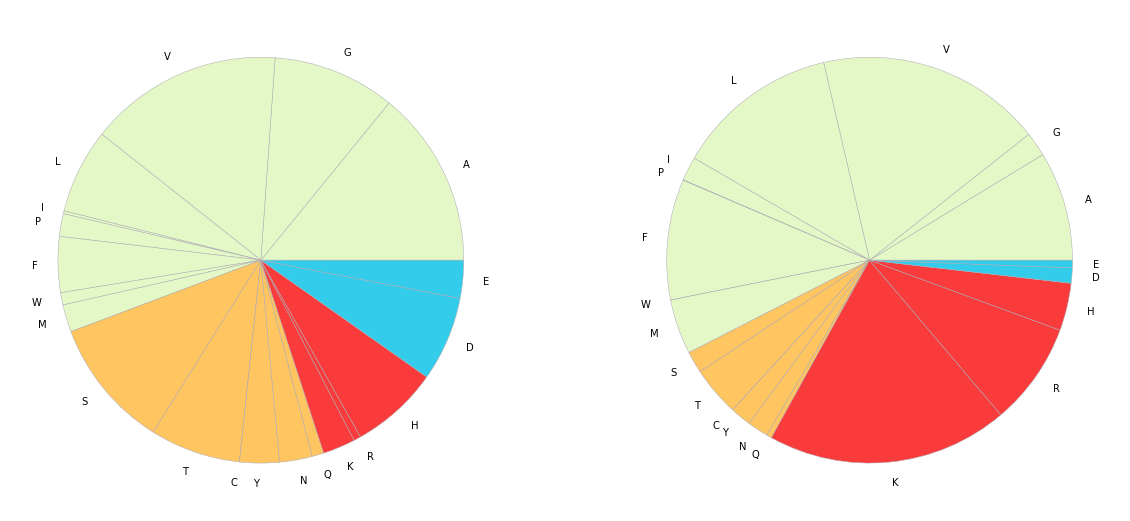

In [560]:
df=df.groupby('Peptide').sum()
df_p=df_p.rename(columns={0:'Peptide'})
df_p=df_p.merge(df, on='Peptide', how='inner')
df_p_prime=df_p_prime.rename(columns={0:'Peptide'})
df_p_prime=df_p_prime.merge(df, on='Peptide', how='inner')
df_p=df_p[['Peptide','#Feature']]
df_p_prime=df_p_prime[['Peptide','#Feature']]
df_p['First aa']=df_p['Peptide'].apply(lambda x: x[2])
df_p_prime['Last aa']=df_p_prime['Peptide'].apply(lambda x: x[-3])
First_aa=get_letter_frequency(df_p['First aa']*df_p['#Feature'])
Last_aa=get_letter_frequency(df_p_prime['Last aa']*df_p_prime['#Feature'])
fig, ax = plt.subplots(1,2,figsize=(20,10))
wp = { 'linewidth' : 0.5, 'edgecolor' : "#afabb3" } 
color=['#e4f8c7', '#e4f8c7','#e4f8c7','#e4f8c7','#e4f8c7','#e4f8c7','#e4f8c7','#e4f8c7','#e4f8c7','#ffc561','#ffc561','#ffc561','#ffc561','#ffc561','#ffc561','#f93b3b','#f93b3b','#f93b3b','#34cceb','#34cceb','#34cceb']
ax[0].pie(First_aa.values(),labels = First_aa.keys(), colors=color, wedgeprops=wp) 
ax[1].pie(Last_aa.values(),labels = Last_aa.keys(), colors=color, wedgeprops=wp) 
print(First_aa)
print(Last_aa)

In [561]:
mapp='protein-peptide_sample_ninf'
files = os.listdir(mapp)
# gets all xlsx files in cwd
files_xlsx = [f for f in files if f[-4:] == 'xlsx']
df_first = pd.DataFrame() # the dataframe to be analyzed 
df_last = pd.DataFrame()
df=pd.DataFrame()
number_of_files=0
for file in files_xlsx:
    data = pd.read_excel(mapp+ '/' +file)
    data = data.loc[(data['#Feature'] >= 4)]
    data['Peptide']= data['Peptide'].str.replace('\d+', '')
    data['Peptide']= data['Peptide'].str.replace(r'\(\+\.\)', '')
    data['Peptide'].drop_duplicates(inplace=True)
    p_prime=[]
    p=[]
    data['Peptide'].fillna(value='Not available',inplace=True)
    for item in data['Peptide']:
        if item[-2] == '.':
            p_prime.append(item)
        if item[1]=='.':
            p.append(item)
    df=df.append(data)
    
    
df_p=pd.DataFrame(p)
df_p_prime=pd.DataFrame(p_prime)

{'A': 839, 'G': 562, 'V': 1088, 'L': 723, 'I': 105, 'P': 228, 'F': 372, 'W': 22, 'M': 271, 'S': 889, 'T': 479, 'C': 0, 'Y': 80, 'N': 166, 'Q': 146, 'K': 113, 'R': 155, 'H': 548, 'D': 533, 'E': 268}
{'A': 483, 'G': 214, 'V': 764, 'L': 618, 'I': 177, 'P': 53, 'F': 267, 'W': 0, 'M': 88, 'S': 159, 'T': 314, 'C': 0, 'Y': 81, 'N': 92, 'Q': 123, 'K': 1418, 'R': 1564, 'H': 324, 'D': 53, 'E': 126}


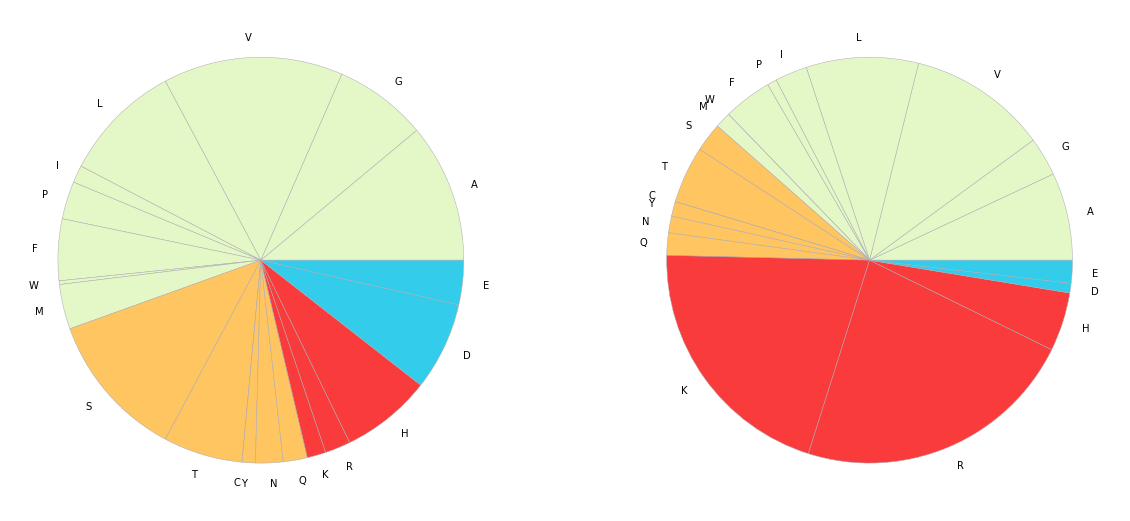

In [562]:
df=df.groupby('Peptide').sum()
df_p=df_p.rename(columns={0:'Peptide'})
df_p=df_p.merge(df, on='Peptide', how='inner')
df_p_prime=df_p_prime.rename(columns={0:'Peptide'})
df_p_prime=df_p_prime.merge(df, on='Peptide', how='inner')
df_p=df_p[['Peptide','#Feature']]
df_p_prime=df_p_prime[['Peptide','#Feature']]
df_p['First aa']=df_p['Peptide'].apply(lambda x: x[2])
df_p_prime['Last aa']=df_p_prime['Peptide'].apply(lambda x: x[-3])
First_aa=get_letter_frequency(df_p['First aa']*df_p['#Feature'])
Last_aa=get_letter_frequency(df_p_prime['Last aa']*df_p_prime['#Feature'])
fig, ax = plt.subplots(1,2,figsize=(20,10))
wp = { 'linewidth' : 0.5, 'edgecolor' : "#afabb3" } 
color=['#e4f8c7', '#e4f8c7','#e4f8c7','#e4f8c7','#e4f8c7','#e4f8c7','#e4f8c7','#e4f8c7','#e4f8c7','#ffc561','#ffc561','#ffc561','#ffc561','#ffc561','#ffc561','#f93b3b','#f93b3b','#f93b3b','#34cceb','#34cceb','#34cceb']
ax[0].pie(First_aa.values(),labels = First_aa.keys(), colors=color, wedgeprops=wp) 
ax[1].pie(Last_aa.values(),labels = Last_aa.keys(), colors=color, wedgeprops=wp) 
print(First_aa)
print(Last_aa)

{'A': 1059, 'G': 1028, 'V': 1171, 'L': 990, 'I': 227, 'P': 287, 'F': 945, 'W': 84, 'M': 251, 'S': 1730, 'T': 1121, 'C': 0, 'Y': 313, 'N': 618, 'Q': 159, 'K': 326, 'R': 135, 'H': 499, 'D': 776, 'E': 376}
{'A': 704, 'G': 420, 'V': 1952, 'L': 1873, 'I': 886, 'P': 58, 'F': 1727, 'W': 0, 'M': 361, 'S': 349, 'T': 574, 'C': 0, 'Y': 175, 'N': 111, 'Q': 308, 'K': 326, 'R': 932, 'H': 201, 'D': 219, 'E': 102}


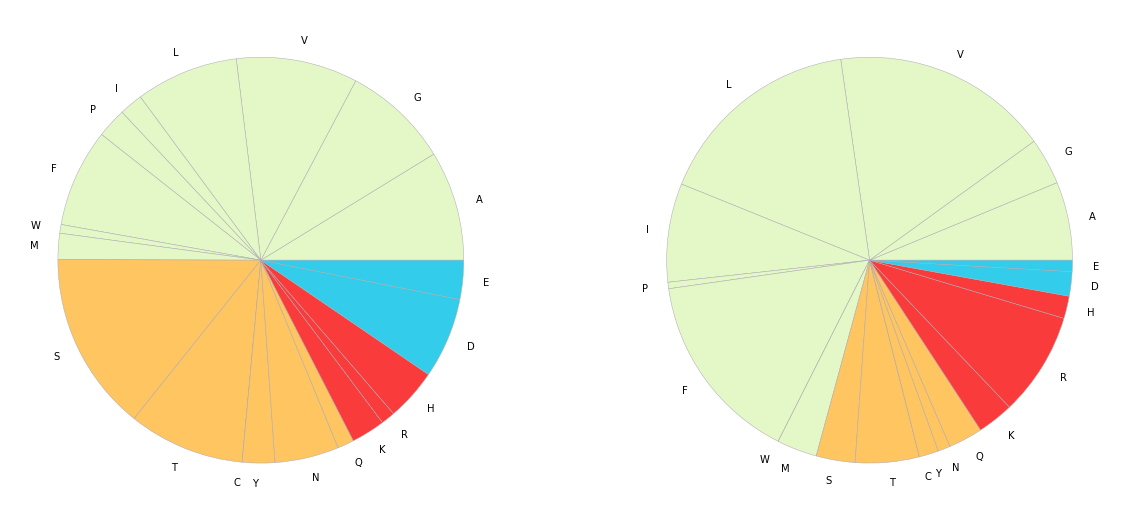

In [585]:
mapp='protein-peptide_sample_WF'
files = os.listdir(mapp)
# gets all xlsx files in cwd
files_xlsx = [f for f in files if f[-4:] == 'xlsx']
df_first = pd.DataFrame() # the dataframe to be analyzed 
df_last = pd.DataFrame()
df=pd.DataFrame()
number_of_files=0
for file in files_xlsx:
    data = pd.read_excel(mapp+ '/' +file)
    data = data.loc[(data['#Feature'] >= 4)]
    data['Peptide']= data['Peptide'].str.replace('\d+', '')
    data['Peptide']= data['Peptide'].str.replace(r'\(\+\.\)', '')
    data['Peptide'].drop_duplicates(inplace=True)
    p_prime=[]
    p=[]
    data['Peptide'].fillna(value='Not available',inplace=True)
    for item in data['Peptide']:
        if item[-2] == '.':
            p_prime.append(item)
        if item[1]=='.':
            p.append(item)
    df=df.append(data)
    
    
df_p=pd.DataFrame(p)
df_p_prime=pd.DataFrame(p_prime)

df=df.groupby('Peptide').sum()
df_p=df_p.rename(columns={0:'Peptide'})
df_p=df_p.merge(df, on='Peptide', how='inner')
df_p_prime=df_p_prime.rename(columns={0:'Peptide'})
df_p_prime=df_p_prime.merge(df, on='Peptide', how='inner')
df_p=df_p[['Peptide','#Feature']]
df_p_prime=df_p_prime[['Peptide','#Feature']]
df_p['First aa']=df_p['Peptide'].apply(lambda x: x[2])
df_p_prime['Last aa']=df_p_prime['Peptide'].apply(lambda x: x[-3])
First_aa=get_letter_frequency(df_p['First aa']*df_p['#Feature'])
Last_aa=get_letter_frequency(df_p_prime['Last aa']*df_p_prime['#Feature'])
fig, ax = plt.subplots(1,2,figsize=(20,10))
wp = { 'linewidth' : 0.5, 'edgecolor' : "#afabb3" } 
color=['#e4f8c7', '#e4f8c7','#e4f8c7','#e4f8c7','#e4f8c7','#e4f8c7','#e4f8c7','#e4f8c7','#e4f8c7','#ffc561','#ffc561','#ffc561','#ffc561','#ffc561','#ffc561','#f93b3b','#f93b3b','#f93b3b','#34cceb','#34cceb','#34cceb']
ax[0].pie(First_aa.values(),labels = First_aa.keys(), colors=color, wedgeprops=wp) 
ax[1].pie(Last_aa.values(),labels = Last_aa.keys(), colors=color, wedgeprops=wp) 
print(First_aa)
print(Last_aa)

# Exclude HBA/HBB

In [583]:
def accession_slice(word):
    if '|' in word:
        word= word.split('|')[2]
        word=word.split(':')[0]
        word=word.split('_')[0]
        return word
    else:
        return word
    
    
folder='peptide_sample_ninf'
files = os.listdir(folder)
# gets all xlsx files in cwd
files_xlsx = [f for f in files if f[-4:] == 'xlsx']
df = pd.DataFrame()
for file in files_xlsx:
    data = pd.read_excel(folder+ '/' +file, 'peptide')
    data=data.loc[data['#Feature']>=4]
    df = df.append(data)

df.dropna(subset=['Accession'], inplace=True, how='any')
df.reset_index(drop=True)
df['count'] = 1
df['Accession']=df['Accession'].apply(lambda x: accession_slice(x))
df = df.groupby(['Accession']).sum()
df = df.drop(['HBB','HBA','HBD'])

tot=df['#Feature'].sum()
df=df.sort_values(['#Feature'], ascending=False)[0:30]
df=df['#Feature']
df_misc=df[10:len(df)]
df_imp=df[0:10]
df_list_imp=list(df_imp)
other =df_misc.sum()
df_list_imp.append(other)
df_list_imp

[876, 417, 381, 230, 198, 162, 123, 114, 108, 92, 904]

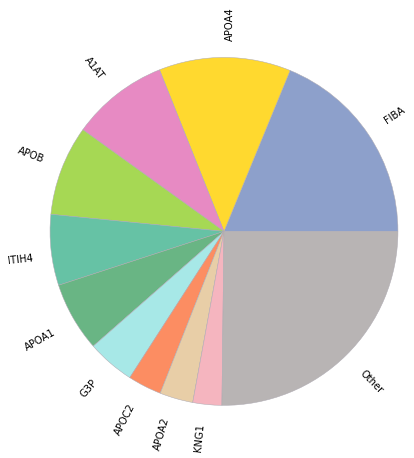

In [582]:

keys =(list(df_imp.keys()))
keys.append('Other')

g=(0.4, 0.7607843137254902, 0.6470588235294118)
r=(0.9882352941176471, 0.5529411764705883, 0.3843137254901961)
l=(0.5529411764705883, 0.6274509803921569, 0.796078431372549)
p=(0.9058823529411765, 0.5411764705882353, 0.7647058823529411)
lg=(0.6509803921568628, 0.8470588235294118, 0.32941176470588235)
y=(1.0, 0.8509803921568627, 0.1843137254901961)

rc1=('#69b584')
rc2=('#a7e8e7')
rc3=('#e8cea7')
rc4=('#f5b5bf')
rc5=('#b8b4b4')

WF_colors=[l,y,p,lg,g,rc1,rc2,r,rc3,rc4,rc5]
wp = { 'linewidth' : 0.5, 'edgecolor' : "#afabb3" } 
pie=plt.pie(list(df_list_imp),labels = keys , wedgeprops=wp, rotatelabels=True, colors=WF_colors, radius=2) 


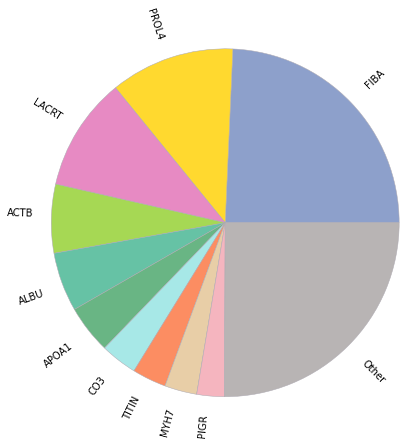

In [584]:
keys =(list(df_imp.keys()))
keys.append('Other')

g=(0.4, 0.7607843137254902, 0.6470588235294118)
r=(0.9882352941176471, 0.5529411764705883, 0.3843137254901961)
l=(0.5529411764705883, 0.6274509803921569, 0.796078431372549)
p=(0.9058823529411765, 0.5411764705882353, 0.7647058823529411)
lg=(0.6509803921568628, 0.8470588235294118, 0.32941176470588235)
y=(1.0, 0.8509803921568627, 0.1843137254901961)

rc1=('#69b584')
rc2=('#a7e8e7')
rc3=('#e8cea7')
rc4=('#f5b5bf')
rc5=('#b8b4b4')

WF_colors=[l,y,p,lg,g,rc1,rc2,r,rc3,rc4,rc5]
wp = { 'linewidth' : 0.5, 'edgecolor' : "#afabb3" } 
pie=plt.pie(list(df_list_imp),labels = keys , wedgeprops=wp, rotatelabels=True, colors=WF_colors, radius=2 )


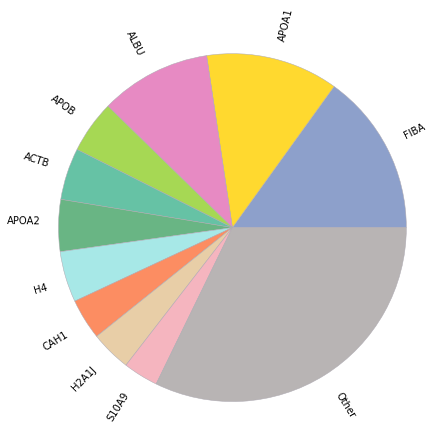

In [580]:
keys =(list(df_imp.keys()))
keys.append('Other')

g=(0.4, 0.7607843137254902, 0.6470588235294118)
r=(0.9882352941176471, 0.5529411764705883, 0.3843137254901961)
l=(0.5529411764705883, 0.6274509803921569, 0.796078431372549)
p=(0.9058823529411765, 0.5411764705882353, 0.7647058823529411)
lg=(0.6509803921568628, 0.8470588235294118, 0.32941176470588235)
y=(1.0, 0.8509803921568627, 0.1843137254901961)

rc1=('#69b584')
rc2=('#a7e8e7')
rc3=('#e8cea7')
rc4=('#f5b5bf')
rc5=('#b8b4b4')

WF_colors=[l,y,p,lg,g,rc1,rc2,r,rc3,rc4,rc5]
wp = { 'linewidth' : 0.5, 'edgecolor' : "#afabb3" } 
pie=plt.pie(list(df_list_imp),labels = keys , wedgeprops=wp, rotatelabels=True, colors=WF_colors, radius=2) 
